# Description
## Background and Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

## Objective

To predict whether a liability customer will buy a personal loan or not.
Which variables are most significant.
Which segment of customers should be targeted more.<br>
Data Dictionary<br>
* ID: Customer ID<br>
* Age: Customer’s age in completed years<br>
* Experience: #years of professional experience<br>
* Income: Annual income of the customer (in thousand dollars)<br>
* ZIP Code: Home Address ZIP code.<br>
* Family: the Family size of the customer<br>
* CCAvg: Average spending on credit cards per month (in thousand dollars)<br>
* Education: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional<br>
* Mortgage: Value of house mortgage if any. (in thousand dollars)<br>
* Personal_Loan: Did this customer accept the personal loan offered in the last campaign?<br>
* Securities_Account: Does the customer have securities account with the bank?<br>
* CD_Account: Does the customer have a certificate of deposit (CD) account with the bank?<br>
* Online: Do customers use internet banking facilities?<br>
* CreditCard: Does the customer use a credit card issued by any other Bank (excluding All life Bank)?<br>

# Imports

In [495]:
# python code more structured
%load_ext nb_black

# Libraries for Data reading and Data anupulations
import numpy as np
import pandas as pd

# Libraries Used for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# used to not show the warnings and the deprecation notes
import warnings

warnings.filterwarnings("ignore")

from sklearn import metrics

# used to set no limit on number of columns displayed
pd.set_option("display.max_columns", None)
# used to set a limit on the number of rows displayed
pd.set_option("display.max_rows", 200)

# used to build decision trees
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

# LogisticRegression model
from sklearn.linear_model import LogisticRegression

# used for spliting the data
from sklearn.model_selection import train_test_split

# used to tune different models
from sklearn.model_selection import GridSearchCV
from uszipcode import SearchEngine

# used for checking performance of the model- model metrics
from sklearn.metrics import (
    f1_score,
    recall_score,
    precision_score,
    accuracy_score,
    confusion_matrix,
    plot_confusion_matrix,
    make_scorer,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
)

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

# Load the data

In [496]:
# used to read data from the file
ldata = pd.read_csv("Loan_Modelling.csv")

<IPython.core.display.Javascript object>

In [2]:
# copying data to another variable to avoid changes to original data
data = ldata.copy()

NameError: name 'ldata' is not defined

## First 5 rows

In [498]:
data.head()

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49    91107       4    1.6          1         0   
1   2   45          19      34    90089       3    1.5          1         0   
2   3   39          15      11    94720       1    1.0          1         0   
3   4   35           9     100    94112       1    2.7          2         0   
4   5   35           8      45    91330       4    1.0          2         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

<IPython.core.display.Javascript object>

## Last 5 rows

In [499]:
data.tail()

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  \
4995  4996   29           3      40    92697       1    1.9          3   
4996  4997   30           4      15    92037       4    0.4          1   
4997  4998   63          39      24    93023       2    0.3          3   
4998  4999   65          40      49    90034       3    0.5          2   
4999  5000   28           4      83    92612       3    0.8          1   

      Mortgage  Personal_Loan  Securities_Account  CD_Account  Online  \
4995         0              0                   0           0       1   
4996        85              0                   0           0       1   
4997         0              0                   0           0       0   
4998         0              0                   0           0       1   
4999         0              0                   0           0       1   

      CreditCard  
4995           0  
4996           0  
4997           0  
4998           0  
4999           1

<IPython.core.display.Javascript object>

## Shape of data

In [500]:
data.shape

(5000, 14)

<IPython.core.display.Javascript object>

#### Observation
1. The dataset has 5000 rows and 14 columns

## Checking for duplicated values

In [501]:
# used to check duplicates
data[data.duplicated()].count()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

<IPython.core.display.Javascript object>

In [1]:
data.loc[data.duplicated(),:]

NameError: name 'data' is not defined

#### Observations

1. There are no duplicated values in the dataset

## General information on data

In [502]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


<IPython.core.display.Javascript object>

#### Observation

1. The target variable is Personal_Loan column.
2. All the columns are of  int datatype and only CCAvg is of float datatype.


## Checking for nulll values

In [503]:
# checking for null values
data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

<IPython.core.display.Javascript object>

#### Observation

1. There are no null values in the dataset.

# Statistical Summary of the Dataset

In [504]:
# general statistics of the data
data.describe().T

count          mean          std      min       25%  \
ID                  5000.0   2500.500000  1443.520003      1.0   1250.75   
Age                 5000.0     45.338400    11.463166     23.0     35.00   
Experience          5000.0     20.104600    11.467954     -3.0     10.00   
Income              5000.0     73.774200    46.033729      8.0     39.00   
ZIPCode             5000.0  93169.257000  1759.455086  90005.0  91911.00   
Family              5000.0      2.396400     1.147663      1.0      1.00   
CCAvg               5000.0      1.937938     1.747659      0.0      0.70   
Education           5000.0      1.881000     0.839869      1.0      1.00   
Mortgage            5000.0     56.498800   101.713802      0.0      0.00   
Personal_Loan       5000.0      0.096000     0.294621      0.0      0.00   
Securities_Account  5000.0      0.104400     0.305809      0.0      0.00   
CD_Account          5000.0      0.060400     0.238250      0.0      0.00   
Online              5000.0      0.596800     0.490589      0.0      0.00   
CreditCard          5000.0      0.294000     0.455637      0.0      0.00   

                        50%       75%      max  
ID                   2500.5   3750.25   5000.0  
Age                    45.0     55.00     67.0  
Experience             20.0     30.00     43.0  
Income                 64.0     98.00    224.0  
ZIPCode             93437.0  94608.00  96651.0  
Family                  2.0      3.00      4.0  
CCAvg                   1.5      2.50     10.0  
Education               2.0      3.00      3.0  
Mortgage                0.0    101.00    635.0  
Personal_Loan           0.0      0.00      1.0  
Securities_Account      0.0      0.00      1.0  
CD_Account              0.0      0.00      1.0  
Online                  1.0      1.00      1.0  
CreditCard              0.0      1.00      1.0

<IPython.core.display.Javascript object>

#### Observations

##### Age 
1. The average age of the liability customers is 45.
2. The age range varies from 23 to 67
3. 50% of customers are of 50 years of age.

##### Experience 
1. The average years professional experience of the liability customers is 20.
2. The maximum years of experience is 43 years.
2. Experience column has negative values which can be considered as positive values.(This is due to data entry error).

##### Income
1. The average income of the liability customers is 73k  per annum.
2. The income range varies from 8k to 224k
3. 50% of customers have about 64k as income per annum.

##### Mortgage
1. The average Mortgage value of the liability customers is 56.4k.
2. The Mortgage range varies from 0k to 635k

##### CCAvg
1. The average spending on credit cards per month of the liability customers is 1.93k.
2. The CCAvg value ranges from 0k to 10k



In [505]:
cat_cols = [
    "Family",
    "ZIPCode",
    "Education",
    "Personal_Loan",
    "Securities_Account",
    "CD_Account",
    "Online",
    "CreditCard",
]  # All categorical columns

for i in cat_cols:
    print(data[i].value_counts())
    print("\n\n")

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64



94720    169
94305    127
95616    116
90095     71
93106     57
        ... 
96145      1
94087      1
91024      1
93077      1
94598      1
Name: ZIPCode, Length: 467, dtype: int64



1    2096
3    1501
2    1403
Name: Education, dtype: int64



0    4520
1     480
Name: Personal_Loan, dtype: int64



0    4478
1     522
Name: Securities_Account, dtype: int64



0    4698
1     302
Name: CD_Account, dtype: int64



1    2984
0    2016
Name: Online, dtype: int64



0    3530
1    1470
Name: CreditCard, dtype: int64





<IPython.core.display.Javascript object>

#### Observations

1. The ZipCode column has traeted and to be reduced to lesser categories.

# Data Preprocessing

## Treating the ZipCode column

In [506]:
from uszipcode import SearchEngine  # SearchEngine import

county = []
zipcodes = data["ZIPCode"].tolist()
print(len(zipcodes))


engine = SearchEngine()
for zipcode in zipcodes:  # looping through each zipcode
    x = engine.by_zipcode(zipcode)
    if x is None:

        county.append("Unknown")  # Treating unknow zipcode
    else:
        a = x.county  # getting the county from zipcode

        county.append(a)  # appending to county list

5000


<IPython.core.display.Javascript object>

In [507]:
len(county)  # checking the lenght of county list

5000

<IPython.core.display.Javascript object>

In [508]:
data["Zipcode_county"] = county  # Adding county column to dataframe

<IPython.core.display.Javascript object>

In [509]:
data.sample()  # checking the dataset

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  \
1173  1174   24          -1      35    94305       2    1.7          2   

      Mortgage  Personal_Loan  Securities_Account  CD_Account  Online  \
1173         0              0                   0           0       0   

      CreditCard      Zipcode_county  
1173           0  Santa Clara County

<IPython.core.display.Javascript object>

In [510]:
# checkng the value counts of the new ZIPCode_plus_three
County_val = data["Zipcode_county"].value_counts()
County_val

Los Angeles County        1095
San Diego County           568
Santa Clara County         563
Alameda County             500
Orange County              339
San Francisco County       257
San Mateo County           204
Sacramento County          184
Santa Barbara County       154
Yolo County                130
Monterey County            128
Ventura County             114
San Bernardino County      101
Contra Costa County         85
Santa Cruz County           68
Riverside County            56
Marin County                54
Kern County                 54
Unknown                     34
Solano County               33
San Luis Obispo County      33
Humboldt County             32
Sonoma County               28
Fresno County               26
Placer County               24
Butte County                19
Shasta County               18
El Dorado County            17
Stanislaus County           15
San Benito County           14
San Joaquin County          13
Mendocino County             8
Siskiyou

<IPython.core.display.Javascript object>

#### Observations
1.There are  many Zipcode_county in the data, and adding them all as separate columns will make our data  dimension very large.
2. We will use a threshold, and keep only those Zipcode_county with at least as many entries as the threshold.

In [511]:
# we take 15 as threshold
threshold = 15
# list of ZIPCode
Zipcode_county_list = County_val[County_val.values >= threshold].index.to_list()

<IPython.core.display.Javascript object>

#### Observations
1. 15 looks like a good threshold
2. We will keep only those Zipcode_county that are more than 15 , and the rest we will assign as 'Others'.


In [512]:
ZIPCode_county_value = []

for i in range(data.shape[0]):  # iterate over all rows in data
    text = data.Zipcode_county[i]  # getting the values in Zipcode_county_list column
    flag = 0  # flag variable
    for (
        item
    ) in Zipcode_county_list:  # iterate over the list of Zipcode_county_list considered
        if item in text and flag == 0:  # checking if Zipcode_county name is in the row
            ZIPCode_county_value.append(item)
            flag = 1
    if (
        flag == 0
    ):  # if the row values is different from the list of Zipcode_county considered
        ZIPCode_county_value.append("Others")

<IPython.core.display.Javascript object>

In [513]:
# new column ZIPCode_county_values for the ZIPCode_county list
data["ZIPCode_county_values"] = ZIPCode_county_value

<IPython.core.display.Javascript object>

In [514]:
data["ZIPCode_county_values"].value_counts()

Los Angeles County        1095
San Diego County           568
Santa Clara County         563
Alameda County             500
Orange County              339
San Francisco County       257
San Mateo County           204
Sacramento County          184
Santa Barbara County       154
Yolo County                130
Monterey County            128
Ventura County             114
San Bernardino County      101
Contra Costa County         85
Santa Cruz County           68
Others                      67
Riverside County            56
Kern County                 54
Marin County                54
Unknown                     34
San Luis Obispo County      33
Solano County               33
Humboldt County             32
Sonoma County               28
Fresno County               26
Placer County               24
Butte County                19
Shasta County               18
El Dorado County            17
Stanislaus County           15
Name: ZIPCode_county_values, dtype: int64

<IPython.core.display.Javascript object>

In [515]:
# checking the data
data.head()

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49    91107       4    1.6          1         0   
1   2   45          19      34    90089       3    1.5          1         0   
2   3   39          15      11    94720       1    1.0          1         0   
3   4   35           9     100    94112       1    2.7          2         0   
4   5   35           8      45    91330       4    1.0          2         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  \
0              0                   1           0       0           0   
1              0                   1           0       0           0   
2              0                   0           0       0           0   
3              0                   0           0       0           0   
4              0                   0           0       0           1   

         Zipcode_county ZIPCode_county_values  
0    Los Angeles County    Los Angeles County  
1    Los Angeles County    Los Angeles County  
2        Alameda County        Alameda County  
3  San Francisco County  San Francisco County  
4    Los Angeles County    Los Angeles County

<IPython.core.display.Javascript object>

In [516]:
# dropping the remaining two columns
data.drop(["ZIPCode", "Zipcode_county"], axis=1, inplace=True)

<IPython.core.display.Javascript object>

## Treating the Experience column

In [517]:
# function to convert into absolute value
def experience_absolute(val):
    """
    function to convert into absolute value
    val: Value to convert to absolute
    """
    return np.absolute(val)

<IPython.core.display.Javascript object>

In [518]:
data["Experience"] = data["Experience"].apply(experience_absolute)

<IPython.core.display.Javascript object>

In [519]:
data.dtypes

ID                         int64
Age                        int64
Experience                 int64
Income                     int64
Family                     int64
CCAvg                    float64
Education                  int64
Mortgage                   int64
Personal_Loan              int64
Securities_Account         int64
CD_Account                 int64
Online                     int64
CreditCard                 int64
ZIPCode_county_values     object
dtype: object

<IPython.core.display.Javascript object>

In [520]:
experience_valuecounts = data["Experience"].value_counts()
experience_valuecounts

32    154
20    148
9     147
5     146
23    144
35    143
25    142
28    138
18    137
19    135
26    134
3     133
24    131
16    127
14    127
30    126
17    125
34    125
27    125
29    124
22    124
7     121
8     119
6     119
15    119
10    118
13    117
33    117
11    116
37    116
36    114
21    113
4     113
1     107
31    104
12    102
2     100
38     88
39     85
0      66
40     57
41     43
42      8
43      3
Name: Experience, dtype: int64

<IPython.core.display.Javascript object>

#### Observations
1.There are no negative values in the  experience data given

## Dropping the ID column

In [521]:
# Checking the unique values of ID column
data["ID"].nunique()

5000

<IPython.core.display.Javascript object>

#### Observation

1. The ID column is the same as the index of the dataset. hence it is better to drop the column.

In [522]:
# dropping the ID column
data.drop("ID", axis=1, inplace=True)

<IPython.core.display.Javascript object>

In [523]:
data.head()

Age  Experience  Income  Family  CCAvg  Education  Mortgage  Personal_Loan  \
0   25           1      49       4    1.6          1         0              0   
1   45          19      34       3    1.5          1         0              0   
2   39          15      11       1    1.0          1         0              0   
3   35           9     100       1    2.7          2         0              0   
4   35           8      45       4    1.0          2         0              0   

   Securities_Account  CD_Account  Online  CreditCard ZIPCode_county_values  
0                   1           0       0           0    Los Angeles County  
1                   1           0       0           0    Los Angeles County  
2                   0           0       0           0        Alameda County  
3                   0           0       0           0  San Francisco County  
4                   0           0       0           1    Los Angeles County

<IPython.core.display.Javascript object>

## Outlier Analysis

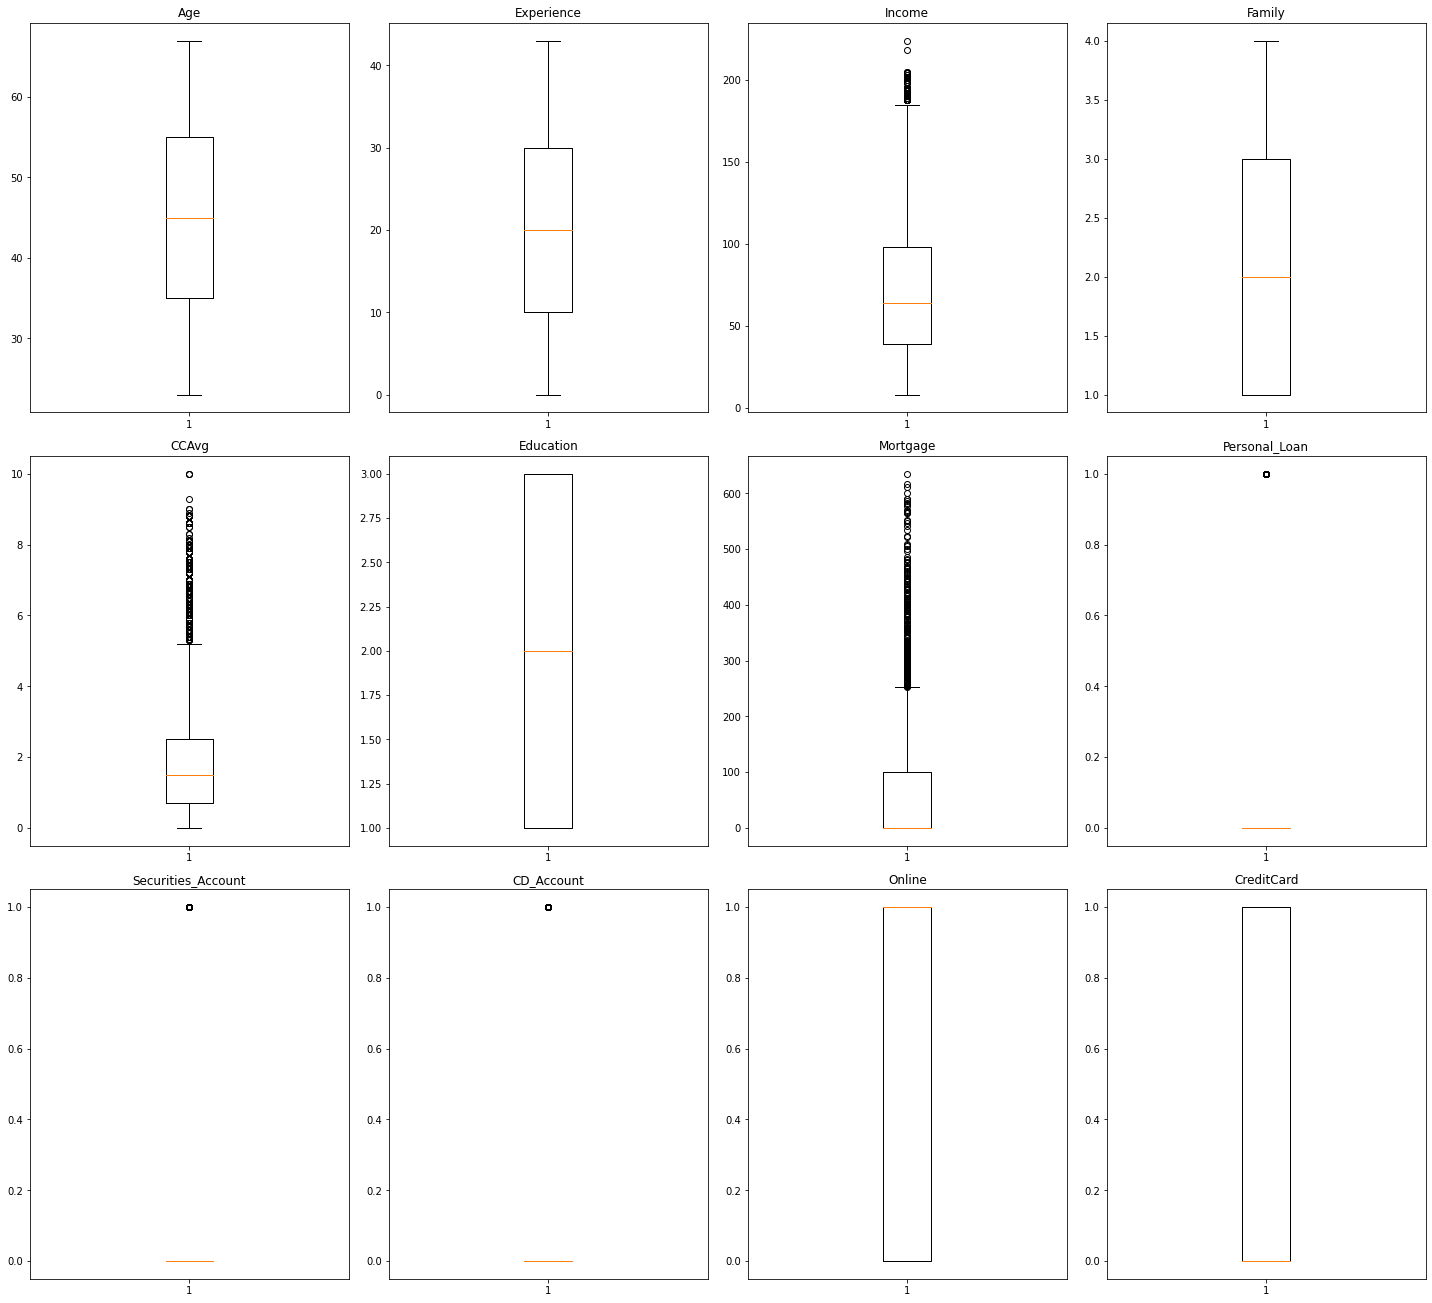

<IPython.core.display.Javascript object>

In [665]:
numerical_data_cols = data.select_dtypes(
    include=np.number
).columns.tolist()  # getting the numeriacl columns alone
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numerical_data_cols):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)  # plot box plot
    plt.tight_layout()
    plt.title(variable)

plt.show()

#### Observations
1. Income ,CCAvg and Mortgage have upper outliers.
2. Looks like income has lesser outliers when compared to CCAvg and Mortgage. 
3. We will further check the outliers of Mortage and CCavg

### Outlier detection using IQR method

In [525]:
# Finding the quartiles Q1 ,Q3, IQR and  4IQR
quartiles = np.quantile(data["Mortgage"][data["Mortgage"].notnull()], [0.25, 0.75])
Mortgage_4iqr = 4 * (quartiles[1] - quartiles[0])
print(f"Q1 = {quartiles[0]}, Q3 = {quartiles[1]}, 4*IQR = {Mortgage_4iqr}")
# getting the values
outlier_Mortgage_4iqr = data.loc[
    np.abs(data["Mortgage"] - data["Mortgage"].median()) > Mortgage_4iqr,
    "Mortgage",
]
outlier_Mortgage_4iqr.nunique()

Q1 = 0.0, Q3 = 101.0, 4*IQR = 404.0


59

<IPython.core.display.Javascript object>

#### Observations
1. There are 59 observations beyond the 4* times IQR range. this is because there are many values which are 0 in the data of Mortgage.
2. Hence all the data are important for the model to make predictions. Hence we will not remove the outliers. They hold valuable informations.

In [526]:
# Finding the quartiles Q1 ,Q3, IQR and  4IQR
quartiles = np.quantile(data["CCAvg"][data["CCAvg"].notnull()], [0.25, 0.75])
CCavg_4iqr = 4 * (quartiles[1] - quartiles[0])
print(f"Q1 = {quartiles[0]}, Q3 = {quartiles[1]}, 4*IQR = {CCavg_4iqr}")
# getting the values
outlier_CCavg_4iqr = data.loc[
    np.abs(data["CCAvg"] - data["CCAvg"].median()) > CCavg_4iqr,
    "CCAvg",
]
outlier_CCavg_4iqr.nunique()

Q1 = 0.7, Q3 = 2.5, 4*IQR = 7.2


5

<IPython.core.display.Javascript object>

#### Observations
1. There are only 5 observations beyond the 4* times IQR range in CCAvg dataset. 
2. All the data are important for the model to make predictions. Hence we will not remove the outliers. They hold valuable informations.

### tmean outlier check

In [527]:
Mortgage = data["Mortgage"][data["Mortgage"].notnull()]
# importing tmean
from scipy.stats import tmean

# tmean removing tails of the data
print(tmean(Mortgage, limits=np.quantile(Mortgage, [0.1, 0.9])))
# tmean within limits
print(tmean(Mortgage, limits=[0, 20]))

29.390715237672147
0.0


<IPython.core.display.Javascript object>

#### Observations
1. There is a significant change in the mean. this is because there are many values which are 0 in the data of Mortgage.
2. All the data in Mortgage are important for the model to make predictions. Hence we will not remove the outliers. They hold valuable informations.

In [528]:
CCAvg = data["CCAvg"][data["CCAvg"].notnull()]
# importing tmean
from scipy.stats import tmean

# tmean removing tails of the data
print(tmean(CCAvg, limits=np.quantile(CCAvg, [0.1, 0.9])))
# tmean within limits
print(tmean(CCAvg, limits=[0, 20]))

1.650559980089597
1.9379380000000002


<IPython.core.display.Javascript object>

#### Observations
1. There is not much change in the tmean for both the analysis in CCAvg dataset.
2. Hence we will not remove the outliers. They hold valuable informations.

# Data Visualization

## Univariate Analysis - Numerical Data

In [529]:
def hist_box_plot(data,feature,kde=False,bins=None,figsize=(12,7)):
    '''
    Returns a histogram and a box plot
    data= data
    features = column
    kde = True/False if we need the density curve
    bin= no of bins for histogram
    fgsize= size of the figure(default 12,7)
    '''
    f2,(ax_box2,ax_hist2) = plt.subplots(
        nrows=2,# rows for the subplot
        sharex=True, # all the subplots share same x asix
        gridspec_kw={"height_ratios":(0.25,0.75)},
        figsize=figsize,
    )# 2 subplots
    sns.boxplot(
        data=data,x=feature,ax=ax_box2,showmeans=True,color="hotpink"
    )  # a boxplot where the mean is indicated with a star
    sns.histplot(
        data=data,x=feature,ax=ax_hist2,bins=bins,color="cyan"
    )if bins else sns.histplot(
        data=data,x=feature,ax=ax_hist2,color="cyan"
    )# plots a histogram
    ax_hist2.axvline(
        data[feature].mean(),linestyle="--",color="green"
    )# adding mean to histogram
    ax_hist2.axvline(
        data[feature].median(),linestyle="--",color="orange"
    )# adding median to histogram
    


<IPython.core.display.Javascript object>

### Age 

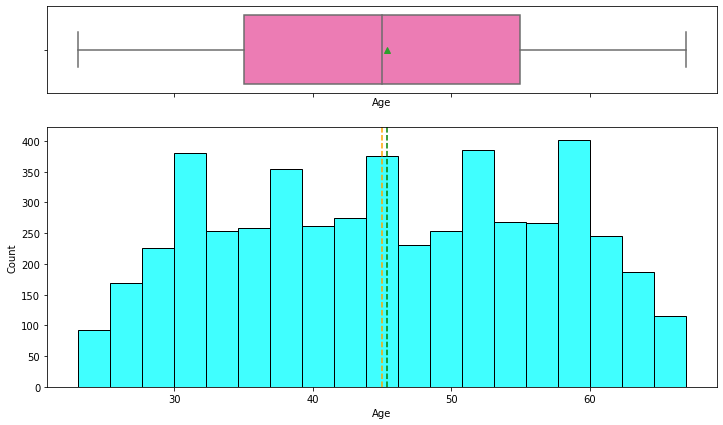

<IPython.core.display.Javascript object>

In [530]:
hist_box_plot(data, "Age", kde=True)

#### Observations
1. The age columns is little close to normal distribution with a mean of 45.
2. There are no outliers in the data.

### Income

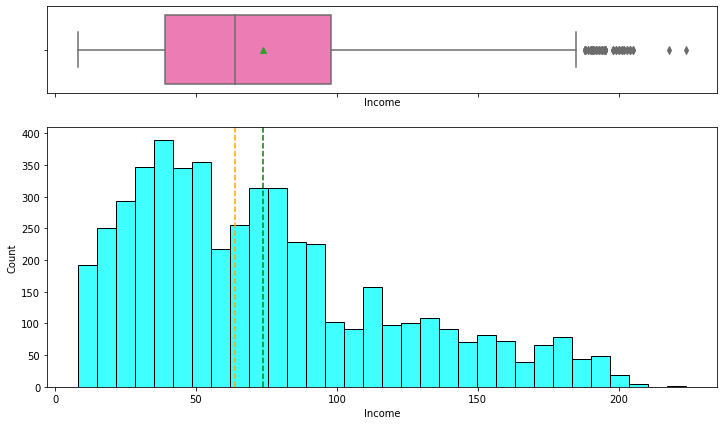

<IPython.core.display.Javascript object>

In [531]:
hist_box_plot(data, "Income", kde=True)

#### Observations
1. The Income data is right skewed with a mean of 73k.
2. The data has outliers.

### CCAvg

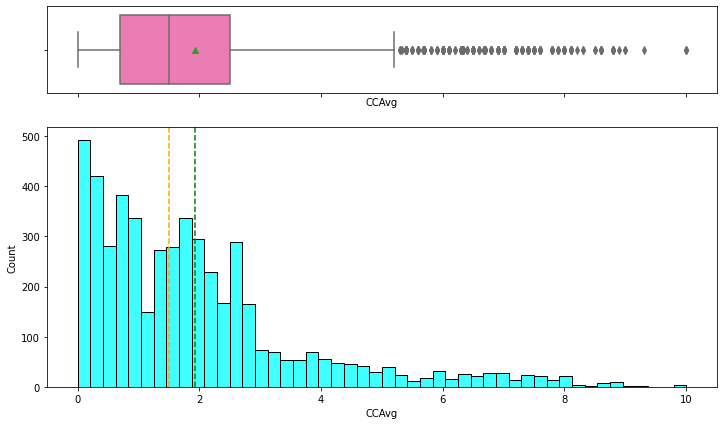

<IPython.core.display.Javascript object>

In [532]:
hist_box_plot(data, "CCAvg", kde=True)

#### Observations
1. The data distribution is right skewed with a mean of 1.93k.
2. The data has outliers but they are important.

### Mortgage

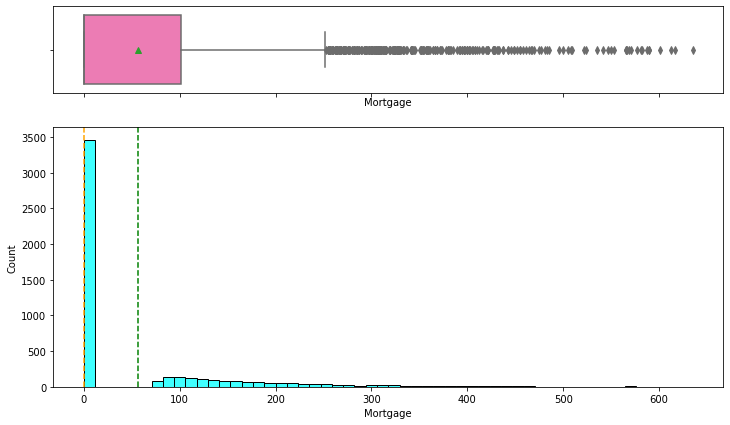

<IPython.core.display.Javascript object>

In [533]:
hist_box_plot(data, "Mortgage", kde=True)

#### Observations
1. The data distribution is heavily right skewed with a mean of 56.4k.
2. The data has a lot of outliers but they are important.

### Experience

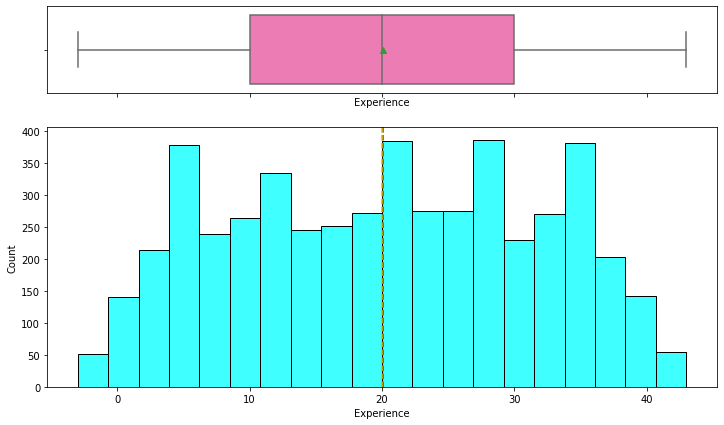

<IPython.core.display.Javascript object>

In [534]:
hist_box_plot(ldata, "Experience", kde=True)

#### Observations
1. The Experience columns is little close to normal distribution with a mean of 20 years.
2. The data has no outliers.

## Univariate Analysis - Categorical Data

In [535]:
# To create a barplot with percentage on top of each
def labelled_bar(data, feature, perc=True, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """
    total = data[feature].shape[0]  # total values of the columns
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)

    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )  # create a count plot

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage for each division of the category

        else:
            label = p.get_height()

        x = p.get_x() + p.get_width() / 2  # width  of plot
        y = p.get_height()  # height of plot

        ax.annotate(
            label,
            (x, y),
            size=12,
            xytext=(0, 5),
            ha="center",
            va="center",
            textcoords="offset points",
        )  # anootate the percentages

    plt.show()  # Finally show the plot

<IPython.core.display.Javascript object>

### Personal_Loan

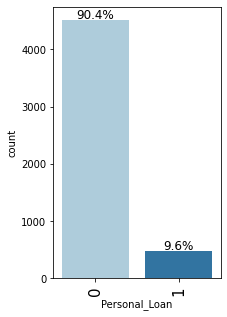

<IPython.core.display.Javascript object>

In [536]:
labelled_bar(data, "Personal_Loan")

#### Observations
1. Almost about 90.4% of liability customers have not applied for personal loan.
2. Only 9.6% of liability customers have applied for personal loan after the last campaign

### Education

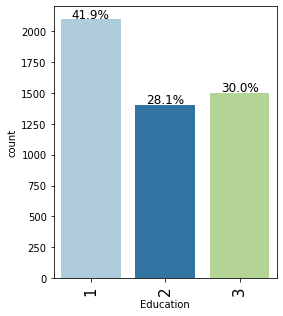

<IPython.core.display.Javascript object>

In [537]:
labelled_bar(data, "Education")

#### Observations
1. 41.9% of liability customers have completed their undergraduation degree only.
2. 28.1% of liability customers have completed their graduate degree.
1. 30% of liability customers have professional/Advanced degrees .

### Family

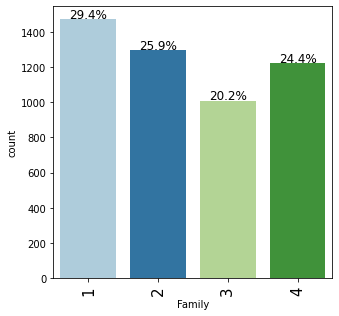

<IPython.core.display.Javascript object>

In [538]:
labelled_bar(data, "Family")

#### Observations

1. 29.4% of liability customers have a family size of 1. This is the highest.
2. 25.9% of liability customers have a family size of 2.
3. 20.2% of liability customers have a family size of 3.
4. 24.4% of liability customers have a family size of 4.


### Securities_Account

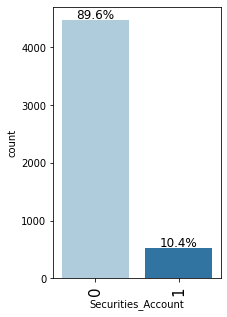

<IPython.core.display.Javascript object>

In [539]:
labelled_bar(data, "Securities_Account")  # Stocks,bonds etc

#### ObservationsDoes the customer have securities account with the bank?
1. About 89.6% of liability customers do not have Securities_Account with the bank.
2. only 10.4% of liability customers have Securities_Account with the bank.

### CD_Account

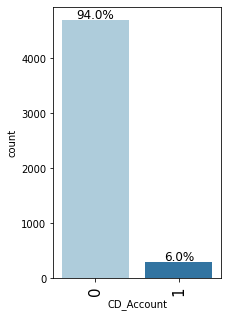

<IPython.core.display.Javascript object>

In [540]:
labelled_bar(data, "CD_Account")
# The definition of certificate of deposit is an account that allows you to save money typically at a fixed interest rate for a fixed amount of time—say, 6 months, 1 year or 5 years.

#### Observations
1. Almost 94% of  liability customers do not have a CD or certificate of deposit account with the bank.
2. Only 6% of customers have certificate of deposit account with the bank

### Online

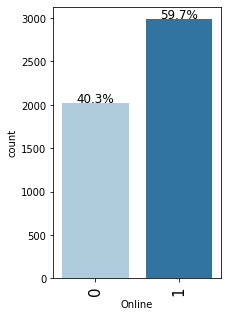

<IPython.core.display.Javascript object>

In [541]:
labelled_bar(data, "Online")  # Do customers use internet banking facilities?

#### Observations
1. 40.3% of customers do not use the internet banking facilities.
2. Alomost more then half of the liability customes use the facilities of internet banking.

### CreditCard

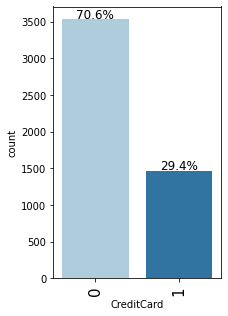

<IPython.core.display.Javascript object>

In [542]:
labelled_bar(data, "CreditCard")
# Does the customer use a credit card issued by any other Bank (excluding All life Bank)?

#### Observations
1. 70.6% of liability customers use credit card issued by other Banks.
1. 29.4% of liability customers do not use credit card issued by other Banks.

### ZIPCode_county_values

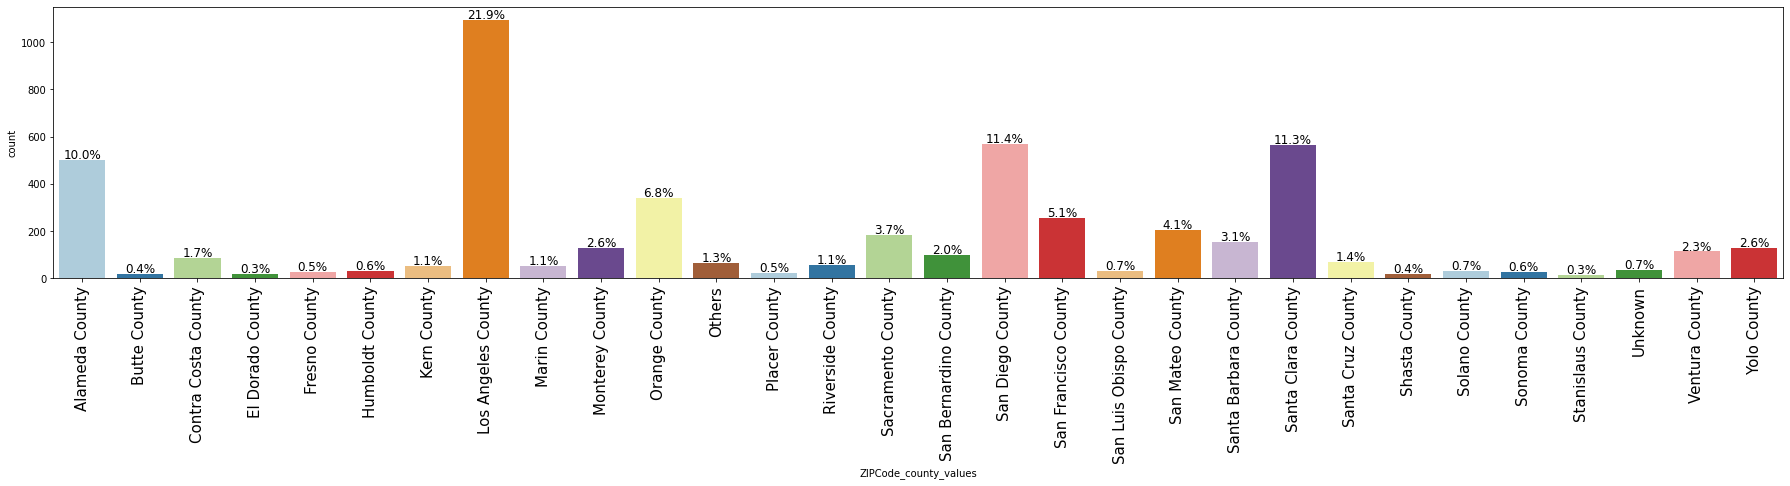

<IPython.core.display.Javascript object>

In [543]:
labelled_bar(data, "ZIPCode_county_values")

#### Observations

1. 21.9% of customers come from a Los Angeles County.
2. San Diego , Santa Clara, Alameda counties are the ones with next highest customers.

# Bivariate Analysis

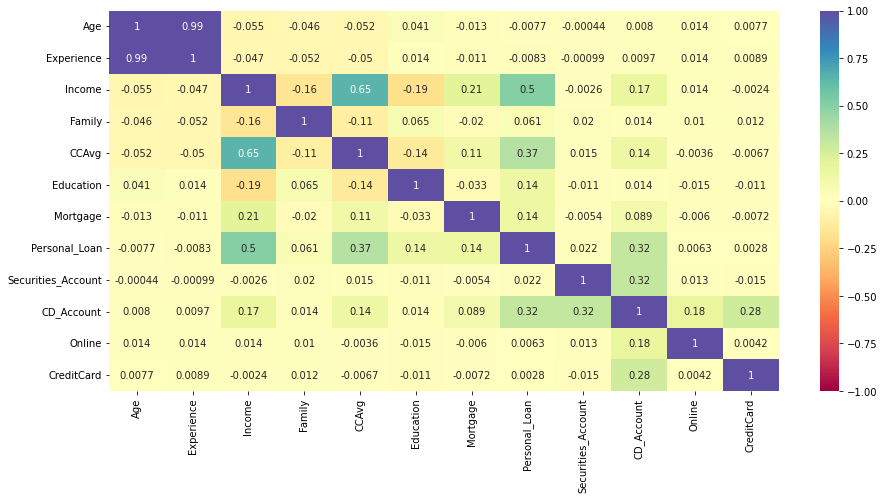

<IPython.core.display.Javascript object>

In [544]:
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, cmap="Spectral")
plt.show()

#### Observations

1. Income has a positive correlation value of 0.65 with CCAvg.
2. Personal_Loan has a positive correlation value of 0.5 with Income.
3. Personal_Loan has a positive correlation value of 0.37 with CCAvg.
4. Personal_Loan has a positive correlation value of 0.32 with CD_Account.
5. Personal_Loan is negatively correlated with Age.
6. Age is very highly correlated with Experience with 0.99 value.


# Pairplot Analysis

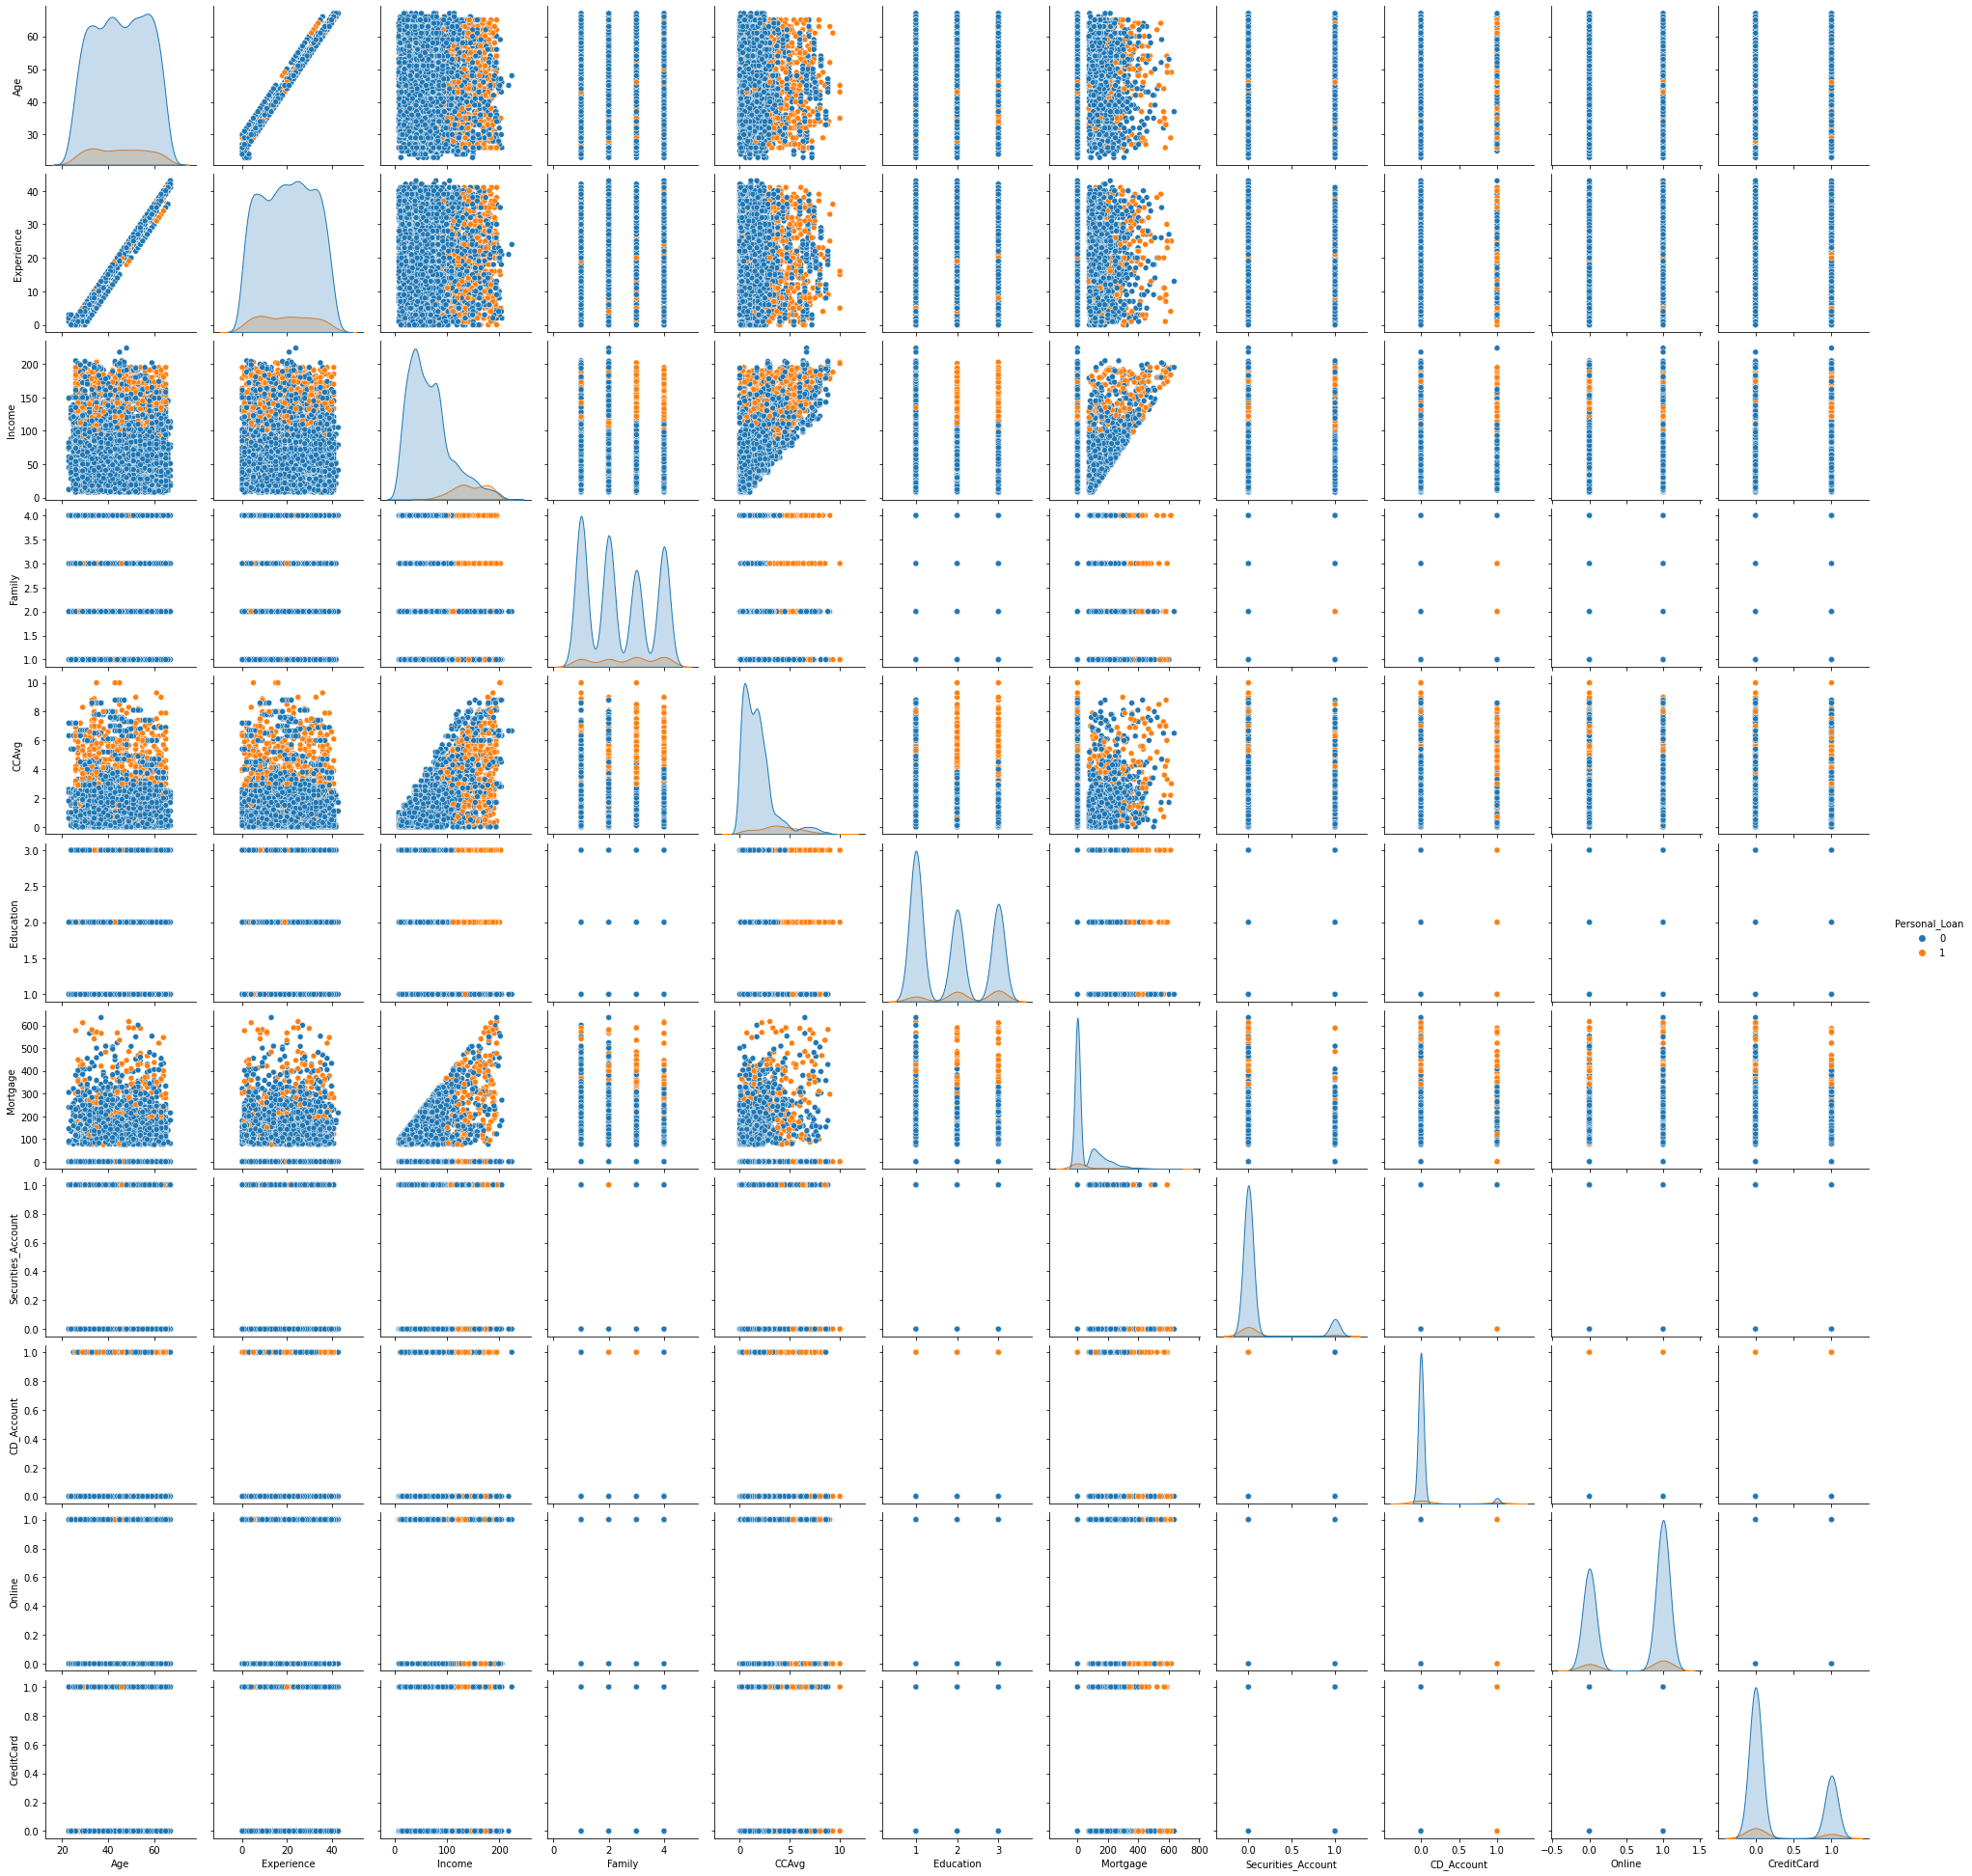

<IPython.core.display.Javascript object>

In [545]:
# plot pair plots with personal_loan as hue
sns.pairplot(data=data, hue="Personal_Loan")
plt.show()

#### Observations

1. We can see varying distributions in variables for Personal Loan, we should investigate it further.

# Multivariate Analysis

## Stacked bar charts

In [546]:
# function to plot stacked bar chart
def stacked_bar(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("/n/n")

    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))
    plt.legend(loc="lower left", frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

<IPython.core.display.Javascript object>

### Education Vs Personal_loan

Personal_Loan     0    1   All
Education                     
All            4520  480  5000
3              1296  205  1501
2              1221  182  1403
1              2003   93  2096
/n/n


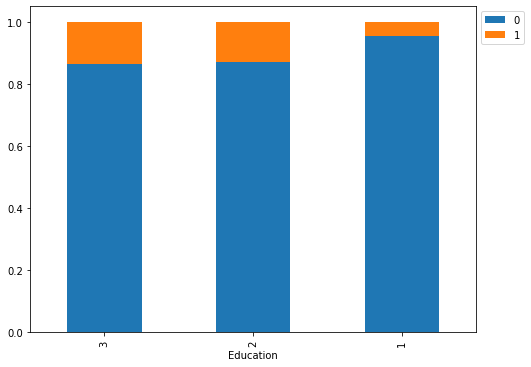

<IPython.core.display.Javascript object>

In [547]:
stacked_bar(data, "Education", "Personal_Loan")

#### Observations
1. Professional degree holders an graduates have purchased personal_loans than single undergraduate degree holders.

Insight
management can concentrate more on highly educated crowds because the conversion rate is high.

### Experience Vs Personal_loan

Personal_Loan     0    1   All
Experience                    
All            4520  480  5000
9               127   20   147
8               101   18   119
3               116   17   133
20              131   17   148
12               86   16   102
5               132   14   146
32              140   14   154
26              120   14   134
25              128   14   142
19              121   14   135
16              114   13   127
37              103   13   116
35              130   13   143
30              113   13   126
23              131   13   144
22              111   13   124
11              103   13   116
31               92   12   104
36              102   12   114
6               107   12   119
18              125   12   137
7               109   12   121
29              112   12   124
28              127   11   138
17              114   11   125
13              106   11   117
21              102   11   113
39               75   10    85
34              115   10   125
27      

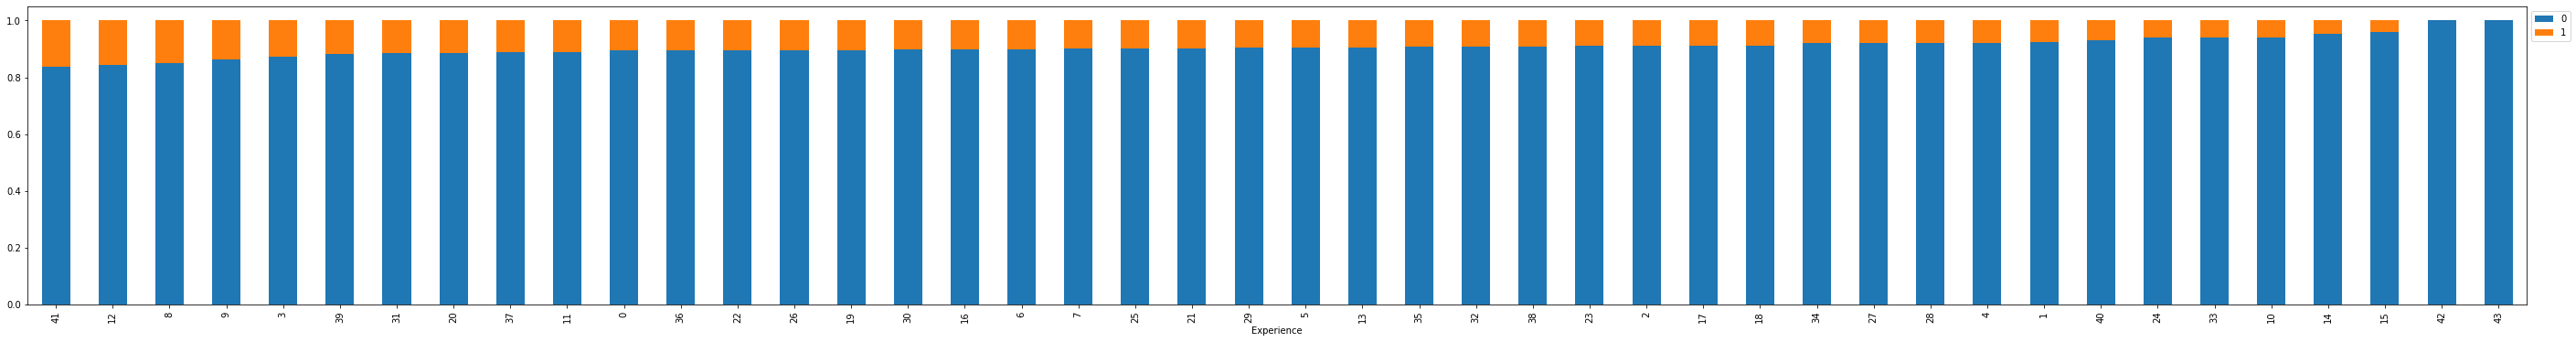

<IPython.core.display.Javascript object>

In [548]:
stacked_bar(data, "Experience", "Personal_Loan")

#### Observations
1. People with 12 and 8 years of experience have bought the most personal_loans due to the campaign.
2. People with 9 and 3 years of experience have bought comparatetively more personal_loans due to the campaign than the rest.

Insight management can concentrate more on highly on middle experience level crowds because the conversion rate is high.

### Family Vs Personal_loan

Personal_Loan     0    1   All
Family                        
All            4520  480  5000
4              1088  134  1222
3               877  133  1010
1              1365  107  1472
2              1190  106  1296
/n/n


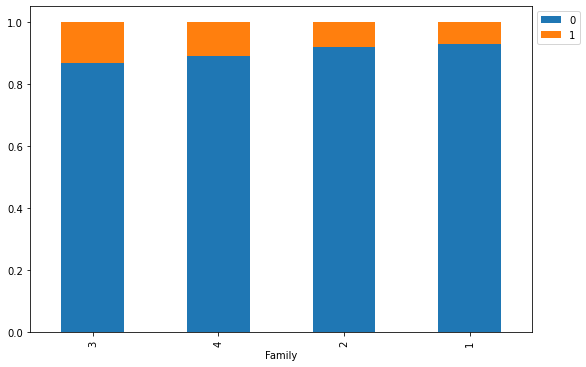

<IPython.core.display.Javascript object>

In [549]:
stacked_bar(data, "Family", "Personal_Loan")

#### Observations
1. Customers with family size of 3 and 4 have taken personal_loans than the others.

Insights
Insight management can concentrate more on highly on bigger families than smaller ones  because the conversion rate is high.

### Securities_Account Vs Personal_loan

Personal_Loan          0    1   All
Securities_Account                 
All                 4520  480  5000
0                   4058  420  4478
1                    462   60   522
/n/n


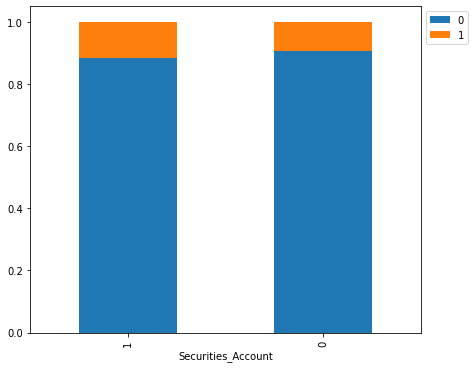

<IPython.core.display.Javascript object>

In [550]:
stacked_bar(data, "Securities_Account", "Personal_Loan")

#### Observations
1. People who have security accounts have personal_loans than people who dont have security accounts.

### CD_Account Vs Personal_loan

Personal_Loan     0    1   All
CD_Account                    
All            4520  480  5000
0              4358  340  4698
1               162  140   302
/n/n


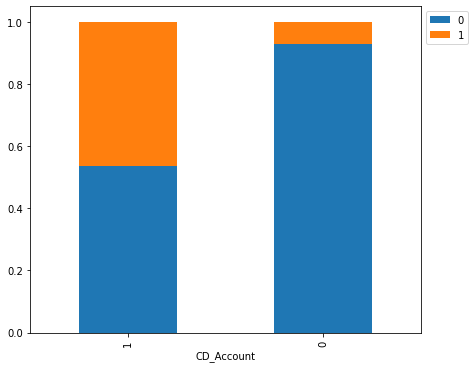

<IPython.core.display.Javascript object>

In [551]:
stacked_bar(data, "CD_Account", "Personal_Loan")

#### Observations
1. Very interesting to note that People who have Cd Accounts have bought personal_loans than people who dont have Cd Accounts.

### Online Vs Personal_loan

Personal_Loan     0    1   All
Online                        
All            4520  480  5000
1              2693  291  2984
0              1827  189  2016
/n/n


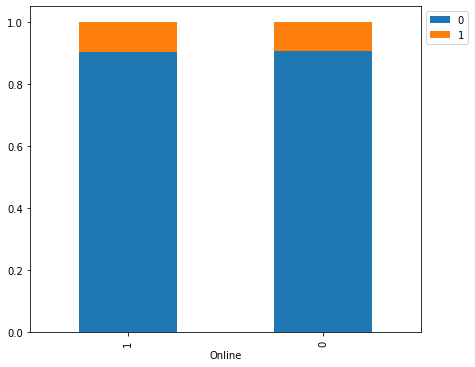

<IPython.core.display.Javascript object>

In [552]:
stacked_bar(data, "Online", "Personal_Loan")

#### Observations
1. Customers who have personal loans using the  internet banking facilities are more than Customers who have personal loans and dont use internet banking facilities

### CreditCard Vs Personal_loan

Personal_Loan     0    1   All
CreditCard                    
All            4520  480  5000
0              3193  337  3530
1              1327  143  1470
/n/n


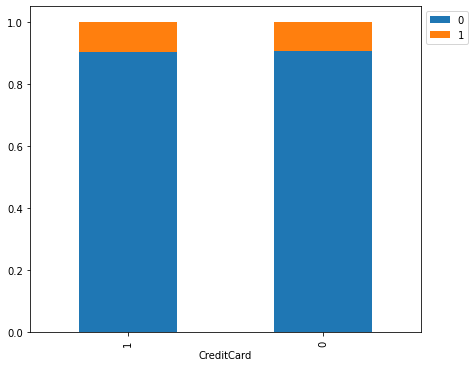

<IPython.core.display.Javascript object>

In [553]:
stacked_bar(data, "CreditCard", "Personal_Loan")

#### Observations
1. Customers who have personal loans using different bank credit cards are more than Customers who have personal loans and dont usedifferent  bank credit cards

### ZIPCode_county_values Vs Personal_loan

Personal_Loan              0    1   All
ZIPCode_county_values                  
All                     4520  480  5000
Los Angeles County       984  111  1095
Santa Clara County       492   71   563
San Diego County         509   59   568
Alameda County           456   44   500
Orange County            309   30   339
San Francisco County     238   19   257
Sacramento County        169   15   184
Monterey County          113   15   128
Contra Costa County       73   12    85
San Mateo County         192   12   204
Santa Barbara County     143   11   154
Ventura County           103   11   114
Santa Cruz County         60    8    68
Yolo County              122    8   130
Kern County               47    7    54
Sonoma County             22    6    28
Riverside County          50    6    56
Marin County              48    6    54
San Luis Obispo County    28    5    33
Shasta County             15    3    18
Solano County             30    3    33
Unknown                   31    3    34


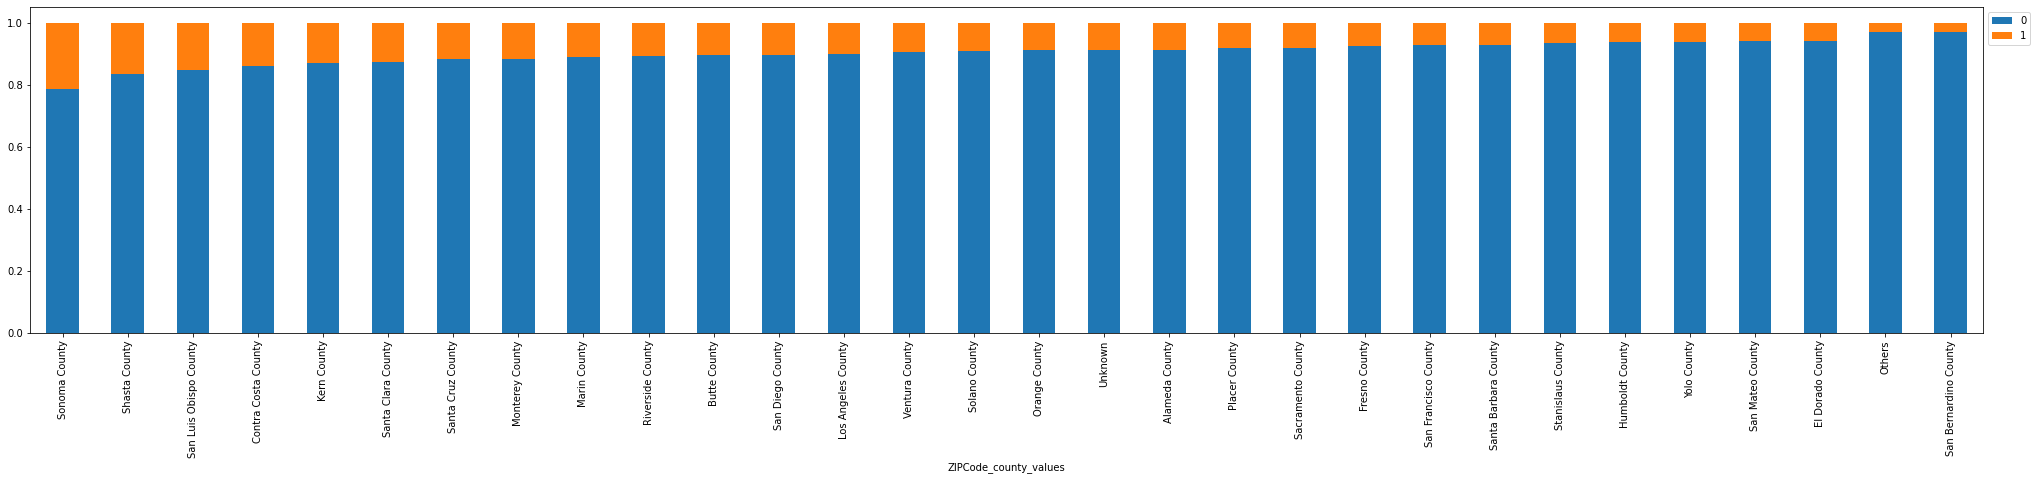

<IPython.core.display.Javascript object>

In [554]:
stacked_bar(data, "ZIPCode_county_values", "Personal_Loan")

#### Observations
1. Customers from Los Angeles County, Santa Clara County, San Diego County, Alameda County regions have bought more Personal_Loans than than the rest.

In [555]:
def distrubution_wrt_target(data, predictor, target):
    """ """
    fg, axs = plt.subplots(2, 2, figsize=(12, 7))
    target_unique = data[target].unique()

    axs[0, 0].set_title("distribution of target wrt target " + str(target_unique[0]))
    sns.histplot(
        data=data[data[target] == target_unique[0]],
        x=predictor,
        stat="density",
        ax=axs[0, 0],
        kde=True,
        color="cyan",
    )
    axs[0, 1].set_title("distribution of target wrt target " + str(target_unique[1]))
    sns.histplot(
        data=data[data[target] == target_unique[1]],
        x=predictor,
        stat="density",
        ax=axs[0, 1],
        kde=True,
        color="violet",
    )

    axs[1, 0].set_title("Box plot wrt to target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")
    axs[1, 1].set_title("Box plot wrt to target without outliers")
    sns.boxplot(
        data=data, x=target, y=predictor, ax=axs[1, 1], showfliers=False, color="yellow"
    )
    plt.tight_layout()
    plt.show()

<IPython.core.display.Javascript object>

### Age Vs Personal_loan

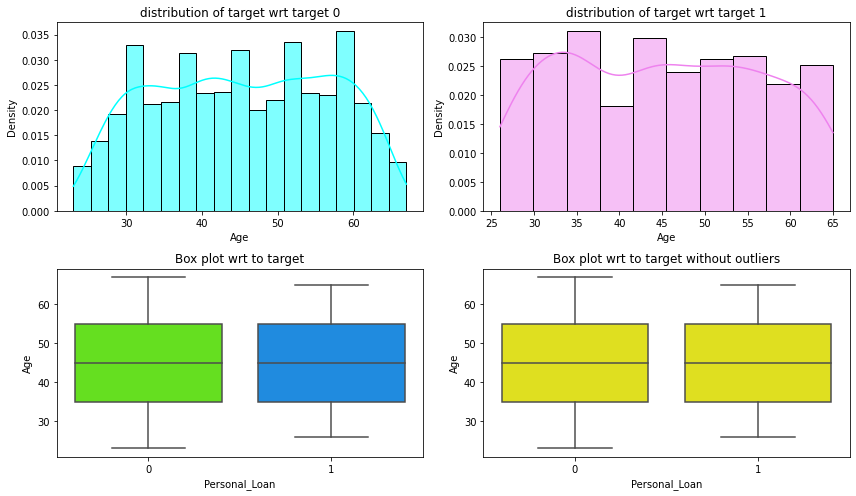

<IPython.core.display.Javascript object>

In [556]:
distrubution_wrt_target(data, "Age", "Personal_Loan")

#### Observations
1.Customers who have taken personal loans have a median of about 45 which is about the same as the customers age who have not taken the personal loan.

### Income Vs Personal_loan

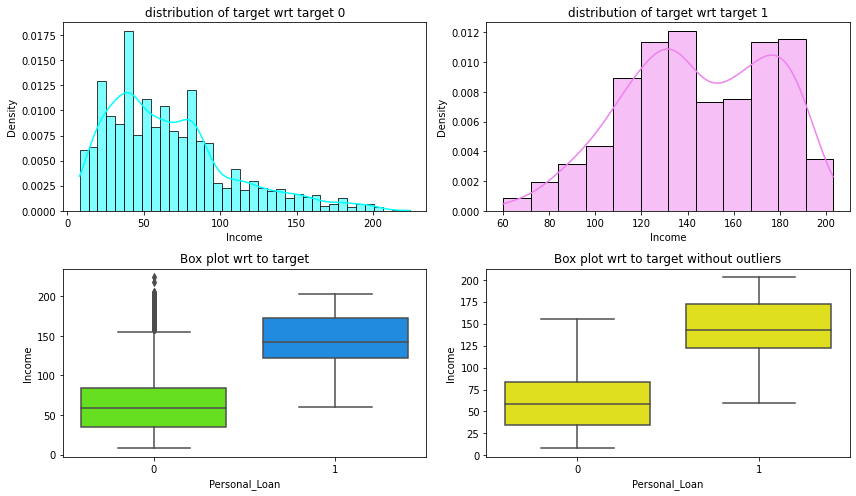

<IPython.core.display.Javascript object>

In [557]:
distrubution_wrt_target(data, "Income", "Personal_Loan")

#### Observations
1. The income of customers who have taken personal loans is significantly higher with a higher medianbetween rage of 140-150k.
2. The income of customers who have not taken personal loans is  lower.

### Mortgage Vs Personal_loan

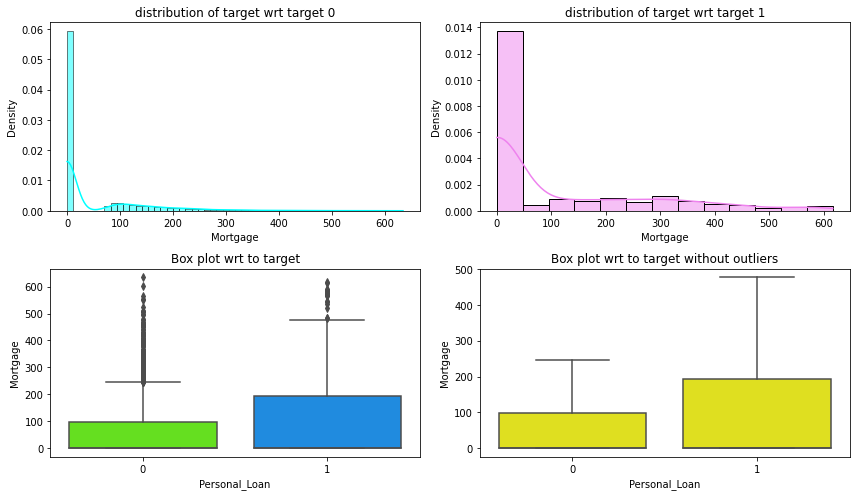

<IPython.core.display.Javascript object>

In [558]:
distrubution_wrt_target(data, "Mortgage", "Personal_Loan")

#### Observations
1. The mortage value of customers who have taken personal loans is higher when compared to customers who do not have personal loans.
2. There are many outliers present

### CCAvg Vs Personal_loan

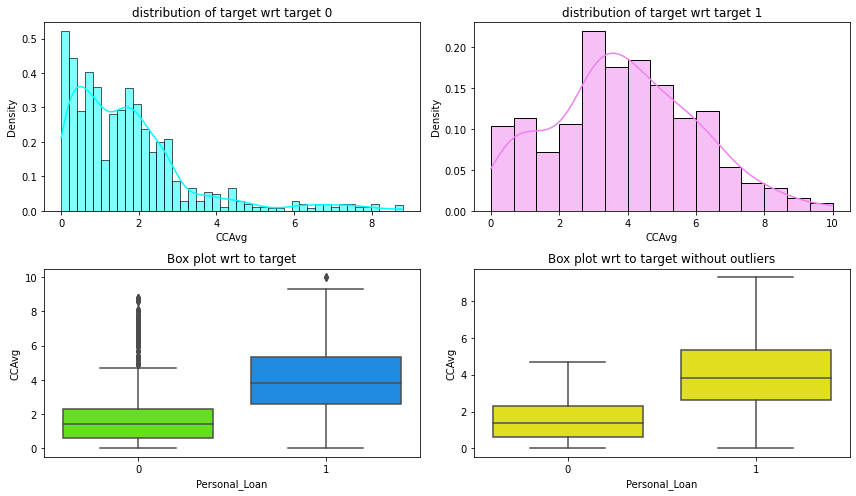

<IPython.core.display.Javascript object>

In [559]:
distrubution_wrt_target(data, "CCAvg", "Personal_Loan")

#### Observations
1. The CCavg of customers who have taken personal loans is higher with a median in the range of about 3.7-4k.
2. The CCavg of customers who have not taken personal loans is lower with a lower median.

### Experience Vs Personal_loan

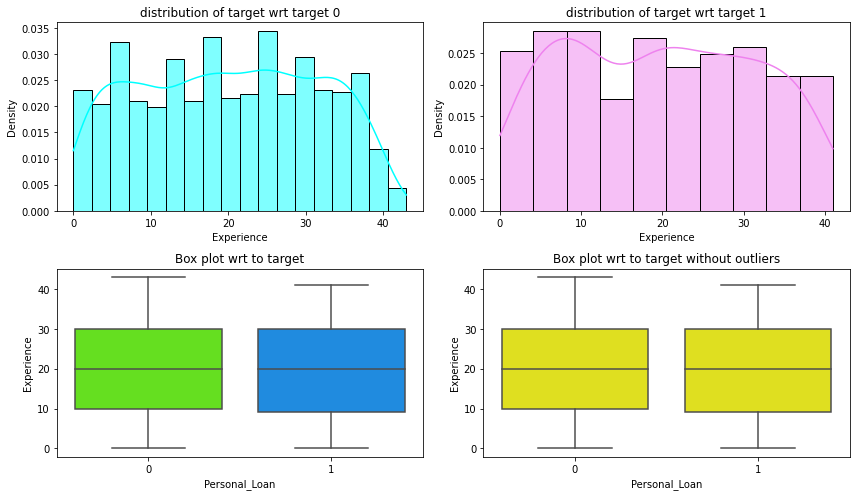

<IPython.core.display.Javascript object>

In [560]:
distrubution_wrt_target(data, "Experience", "Personal_Loan")

#### Observations
1. Customers who have taken person loans have the same median experience years of 20 years

## Question on the Business

## How CCAvg varies with Education across Personal_loan?

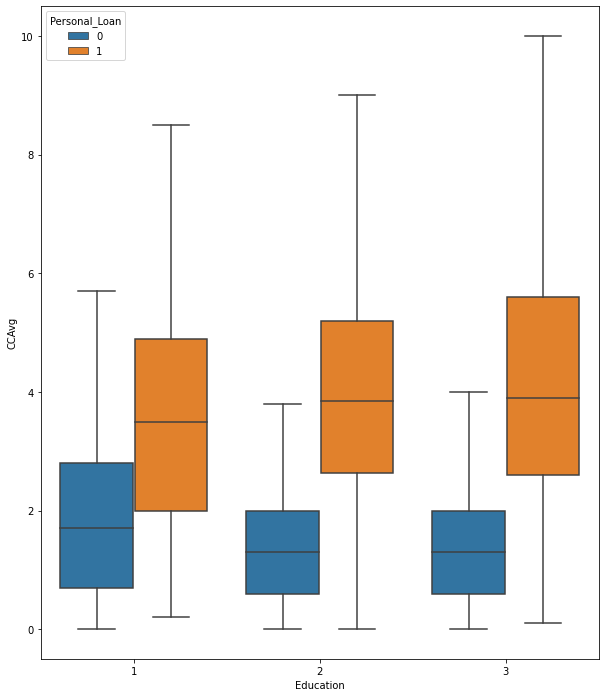

<IPython.core.display.Javascript object>

In [561]:
# lets see how CCAvg varies
plt.figure(figsize=(10, 12))
sns.boxplot(y="CCAvg", x="Education", data=data, hue="Personal_Loan", showfliers=False)
plt.show()

#### Observations
1. Customers with higher education and also has a credit card usage amount median  of range  3.8-4k certainly have a personal loan 
2. people who are professional are likely to have a personal loan.
3. Also people who are undergraduate education level with a credit card usage amount  median  of range 3.4-3.5k are certainly have personal loans.
4. Customers whose credit card usage amount  median is of range 1.5-2k and have any 3 types of education do not have personal loans.

## How CCAvg varies with Family across Personal_loan?

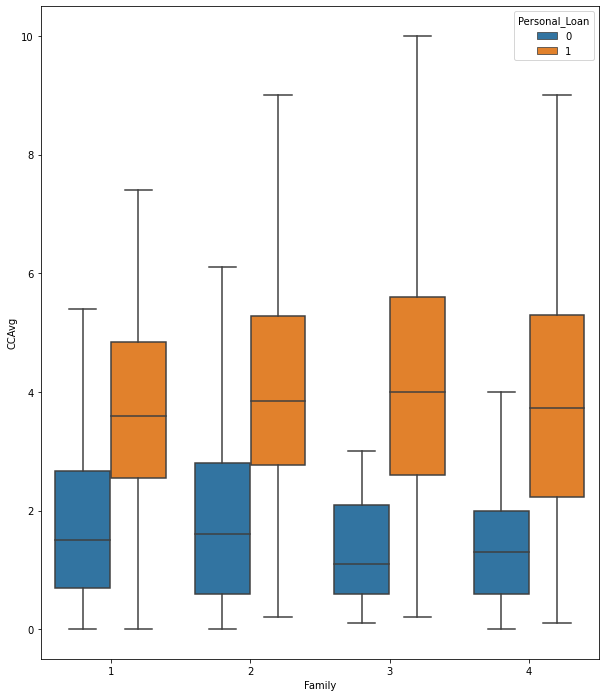

<IPython.core.display.Javascript object>

In [562]:
# lets see how CCAvg varies
plt.figure(figsize=(10, 12))
sns.boxplot(y="CCAvg", x="Family", data=data, hue="Personal_Loan", showfliers=False)
plt.show()

#### Observations
1. Customers with big families and also has a credit card usage amount median  of range 3.5-4k certainly have a personal loan

2. Also people who have smaller families with a credit card usage amount median  of range 3.5-4k are also certain to have personal loans.
3. Customers whose credit card usage amount median is of range 1-1.5k and have any size family do not have personal loans.

## How Income varies with Family across Personal_loan?

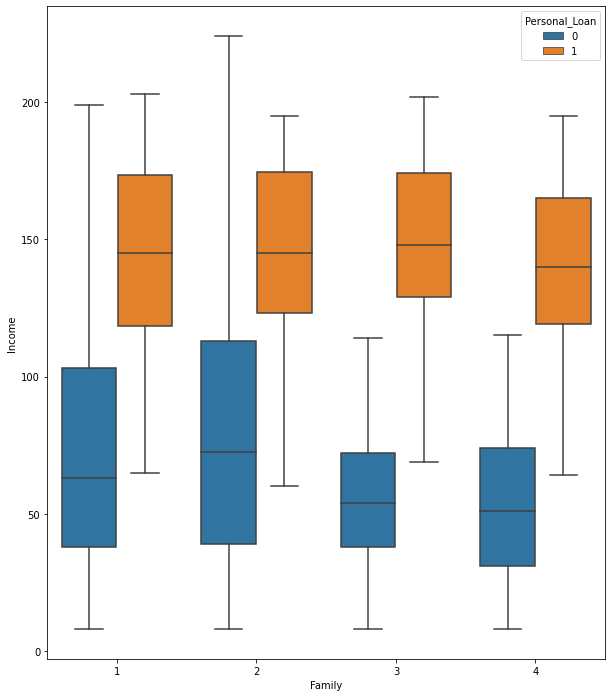

<IPython.core.display.Javascript object>

In [563]:
# lets see how income varies
plt.figure(figsize=(10, 12))
sns.boxplot(y="Income", x="Family", data=data, hue="Personal_Loan", showfliers=False)
plt.show()

#### Observations
1. Customers with big families and also has a significantly higher income with a median  range of 130-150k certainly have a personal loan

2. Also people who have smaller families with  a significantly higher income with a median 140k are also certain to have personal loans.

3. Customers whose income with a median  range of 49-60k and have any size family do not have personal loans.

## How Income varies with Education across Personal_loan?

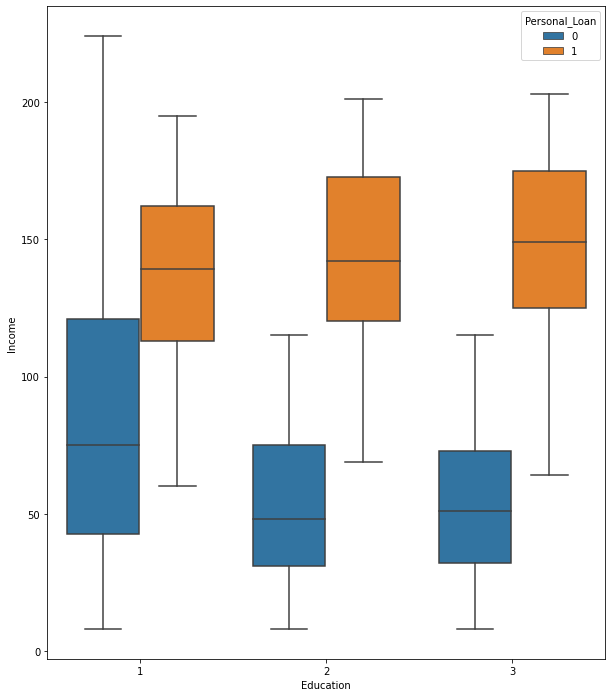

<IPython.core.display.Javascript object>

In [564]:
# lets see how income varies
plt.figure(figsize=(10, 12))
sns.boxplot(y="Income", x="Education", data=data, hue="Personal_Loan", showfliers=False)
plt.show()

#### Observations
1. Customers with higher education and also has a significantly higher income with a median range of 130-150k certainly have a personal loan

2. Also people who have undergraduate degrees with a significantly higher income with a median 140k are also certain to have personal loans.

3. Customers whose income with a median range of 49-70k and have any size family do not have personal loans.

## How Experience varies with Education across Personal_loan?

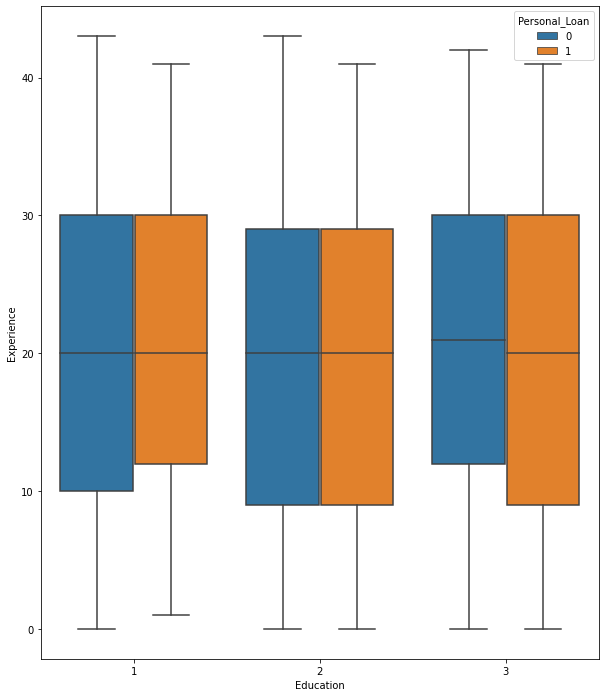

<IPython.core.display.Javascript object>

In [565]:
# lets see how experience varies
plt.figure(figsize=(10, 12))
sns.boxplot(
    y="Experience", x="Education", data=data, hue="Personal_Loan", showfliers=False
)
plt.show()

#### Observations
1. Professional Degree with more experience holders have taken more person loans.
2. Graduate customers there is a balance where with higher experience also they either take or not take Personal Loans.
3. Undergrauate customers with higher experience take more personal loans than lesser experience.

## How Experience varies with Securities_Account across Personal_loan?

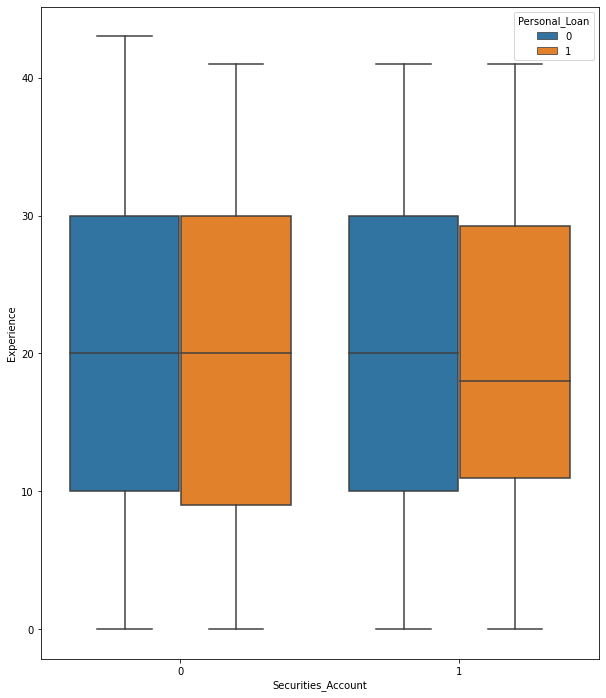

<IPython.core.display.Javascript object>

In [566]:
# lets see how experience varies
plt.figure(figsize=(10, 12))
sns.boxplot(
    y="Experience",
    x="Securities_Account",
    data=data,
    hue="Personal_Loan",
    showfliers=False,
)
plt.show()

#### Observations
1. Customers with security account with  experience 17 years taken more personal loans.
2. Customers without security account with  experience 20 years taken more personal loans.


# Summary of EDA

## Data Description:

1. There are no dulicate values in the dataset.
2. There are no missing values in the data.
3. All the data have data-types as int64 except CCAvg which is of float64.

## Data Preprocessing and Cleaning

1. The ZipCode column was reduced to lesser categories where the "Others" group holds lesser value groups of the Zipcode Category.
2. Experience column has negative values which can be considered as positive values.(This is due to data entry error). But the categories in this column was reduced.Similar to Zipcode, the column was reduced to lesser categories where the "Others" group holds lesser value groups of the Experience Category.
3. ID Column was dropped because it is similar to index.

## Outlier Analysis

1. Income ,CCAvg and Mortgage have upper outliers.
2. Looks like income has lesser outliers when compared to CCAvg and Mortgage.
3. We will further check the outliers of Mortage and CCavg
4. Though there are outliers in the visualization, It is better not to consider them as they will have some valuable information regading the data.

### Outlier detection IQR
##### Mortgage
1. There are 59 observations beyond the 4* times IQR range. this is because there are many values which are 0 in the data of Mortgage.
2. Hence all the data are important for the model to make predictions. Hence we will not remove the outliers. They hold valuable informations.
##### CCAvg
1. There are only 5 observations beyond the 4* times IQR range in CCAvg dataset.
2. All the data are important for the model to make predictions. Hence we will not remove the outliers. They hold valuable informations.
### Outlier detection tmean
##### Mortgage
1. There is a significant change in the mean. this is because there are many values which are 0 in the data of Mortgage.
2. All the data in Mortgage are important for the model to make predictions. Hence we will not remove the outliers. They hold valuable informations.
##### CCAvg
1. There is not much change in the tmean for both the analysis in CCAvg dataset.
2. Hence we will not remove the outliers. They hold valuable informations.


## Observations from EDA

#### Age
1. The average age of the liability customers is 45.
2. The age range varies from 23 to 67
3. 50% of customers are of 50 years of age.
4. The age columns is little close to normal distribution.
5. There are no outliers in the data.

#### Income
1. The average income of the liability customers is 73k per annum.
2. The income range varies from 8k to 224k
3. 50% of customers have about 64k as income per annum.
4. The Income data is right skewed with a mean of 73k.
5. The data has outliers.

#### CCAvg
1. The average spending on credit cards per month of the liability customers is 1.93k.
2. The CCAvg value ranges from 0k to 10k.
3. The data distribution is right skewed with a mean of 1.93k.
4. The data has outliers.

#### Mortgage
1. The average Mortgage value of the liability customers is 56.4k.
2. The Mortgage range varies from 0k to 635k.
3. The data distribution is heavily right skewed with a mean of 56.4k.
4. The data has a lot of outliers.

#### Experience
1. The Experience columns is little close to normal distribution with a mean of 20 years.
2. The data has no outliers.

#### Family
1. 29.4% of liability customers have a family size of 1. This is the highest.
2. 25.9% of liability customers have a family size of 2.
3. 20.2% of liability customers have a family size of 3.
4. 24.4% of liability customers have a family size of 4.

#### Education
1. 41.9% of liability customers have completed their undergraduation degree only.
2. 28.1% of liability customers have completed their graduate degree.
3. 30% of liability customers have professional/Advanced degrees .

#### Personal_Loan
1. This is the target variable.
2. Almost about 90.4% of liability customers have not applied for personal loan.
3. Only 9.6% of liability customers have applied for personal loan after the last campaign

#### Securities_Account
1. About 89.6% of liability customers do not have Securities_Account with the bank.
2. Only 10.4% of liability customers have Securities_Account with the bank.

#### CD_Account
1. Almost 94% of liability customers do not have a CD or certificate of deposit account with the bank.
2. Only 6% of customers have certificate of deposit account with the bank

#### Online
1. 40.3% of customers do not use the internet banking facilities.
2. Almost more then half of the liability customes use the facilities of internet banking.

#### CreditCard
1. 70.6% of liability customers use credit card issued by other Banks.
2. 29.4% of liability customers do not use credit card issued by other Banks.

#### ZIPCode_values
1. 7.5% of customers come from a region with zipcode stating with 900.
2. Others are all spread accross various regions with zipcode starting with 9.In the US Zipcodes first digit of the zip code designates a broad area, which ranges from zero for the Northeast to nine for the far West.

#### Correlation
1. Income has a positive correlation value of 0.65 with CCAvg.
2. Personal_Loan has a positive correlation value of 0.5 with Income.
3. Personal_Loan has a positive correlation value of 0.37 with CCAvg.
4. Personal_Loan has a positive correlation value of 0.32 with CD_Account.
5. Personal_Loan is negatively correlated with Age.



## Independant variables W.R.T Personal_loan 
**Education vs Personal_loan**:Professional degree holders an graduates have purchased personal_loans than single undergraduate degree holders.<br>
**Experience vs Personal_loan**:People with 12 and 8 years of experience have bought the most personal_loans due to the campaign.
People with 9 and 3 years of experience have bought comparatetively more personal_loans due to the campaign than the rest.<br>
**Securities account vs Personal_loan**:People who have security accounts have personal_loans than people who dont have security accounts.<br>
**CD_Account vs Personal_loan**:Very interesting to note that People who have Cd Accounts have bought personal_loans than people who dont have Cd Accounts.<br>
**Online vs Personal_loan**:Customers who have personal loans using the internet banking facilities are more than Customers who have personal loans and dont use internet banking facilities<br>
**Credit_Card vs Personal_loan**:Customers who have personal loans using different bank credit cards are more than Customers who have personal loans and dont usedifferent bank credit cards<br>
**Zip_code vs Personal_loan**:Customers from Los Angeles County, Santa Clara County, San Diego County, Alameda County regions have bought more Personal_Loans than than the rest.<br>
**Age vs Personal_loan**:1.Customers who have taken personal loans have a median age of about 45 which is about the same as the customers age who have not taken the personal loan.<br>
**Income vs Personal_loan**:The income of customers who have taken personal loans is significantly higher with a higher medianbetween rage of 140-150k.<br>
The income of customers who have not taken personal loans is lower.<br>
**Morgage vs Personal_loan**:The mortage value of customers who have taken personal loans is higher when compared to customers who do not have personal loans.
There are many outliers present<br>
**CCAvg vs Personal_loan**:The CCavg of customers who have taken personal loans is higher with a median in the range of about 3.7-4k.<br>
The CCavg of customers who have not taken personal loans is lower with a lower median.<br>
**Experience vs Personal_loan**:Customers who have taken person loans have the same median experience years of 20 years as compared to people who have not taken personal_loans.<br>
**Family vs Personal_loan** :Customers with family size of 3 and 4 have taken personal_loans than the others.<br>



## Questions to understand
1.**How CCAvg varies with Education across Personal_loan?**<br>
Customers with higher education and also has a credit card usage amount median of range 3.8-4k certainly have a personal loan people who are professional are likely to have a personal loan.<br>
Also people who are undergraduate education level with a credit card usage amount median of range 3.4-3.5k are certainly have personal loans.<br>
Customers whose credit card usage amount median is of range 1.5-2k and have any 3 types of education do not have personal loans.<br>
2.**How CCAvg varies with Family across Personal_loan?**<br>
Customers with big families and also has a credit card usage amount median of range 3.5-4k certainly have a personal loan<br>
Also people who have smaller families with a credit card usage amount median of range 3.5-4k are also certain to have personal loans.<br>
Customers whose credit card usage amount median is of range 1-1.5k and have any size family do not have personal loans.<br>
3.**How Income varies with Family across Personal_loan?**<br>
Customers with big families and also has a significantly higher income with a median range of 130-150k certainly have a personal loan<br>
Also people who have smaller families with a significantly higher income with a median 140k are also certain to have personal loans.<br>
Customers whose income with a median range of 49-60k and have any size family do not have personal loans.<br>
4.**How Income varies with Education across Personal_loan?**<br>
Customers with higher education and also has a significantly higher income with a median range of 130-150k certainly have a personal loan<br>
Also people who have undergraduate degrees with a significantly higher income with a median 140k are also certain to have personal loans.<br>
Customers whose income with a median range of 49-70k and have any size family do not have personal loans.<br>
5.**How Experience varies with Education across Personal_loan?**<br>
Professional Degree with more experience holders have taken more person loans.<br>
Graduate customers there is a balance where with higher experience also they either take or not take Personal Loans.<br>
Undergrauate customers with higher experience take more personal loans than lesser experience.<br>
6.**How Experience varies with Securities_Account across Personal_loan?**<br>
Customers with security account with experience 17 years taken more personal loans.<br>
Customers without security account with experience 20 years taken more personal loans.<br>

# Model Building 
   
   Below we will be building 2 models - 
   1. Using Logistic Regression and 
   2. Using Decision Trees

## Data Preparation

In [567]:
data.sample(5)  # checking the dataset

Age  Experience  Income  Family  CCAvg  Education  Mortgage  \
4336   44          19      44       4    0.0          2         0   
271    40          14      70       4    1.4          2         0   
1107   47          21      79       3    1.1          1       185   
3197   34          10      29       1    1.5          2         0   
4960   58          28      81       1    3.0          3         0   

      Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  \
4336              0                   0           0       0           0   
271               0                   0           0       1           0   
1107              0                   0           0       1           1   
3197              0                   0           0       1           0   
4960              0                   0           0       1           0   

     ZIPCode_county_values  
4336    Los Angeles County  
271          Sonoma County  
1107  San Francisco County  
3197           Kern County  
4960    Los Angeles County

<IPython.core.display.Javascript object>

In [568]:
dummy_data = pd.get_dummies(
    data,
    columns=[
        "Family",
        "Education",
        "Securities_Account",
        "CD_Account",
        "Online",
        "CreditCard",
        "ZIPCode_county_values",
    ],
    drop_first=True,
)  # creating dummy variables

dummy_data.head()

Age  Experience  Income  CCAvg  Mortgage  Personal_Loan  Family_2  \
0   25           1      49    1.6         0              0         0   
1   45          19      34    1.5         0              0         0   
2   39          15      11    1.0         0              0         0   
3   35           9     100    2.7         0              0         0   
4   35           8      45    1.0         0              0         0   

   Family_3  Family_4  Education_2  Education_3  Securities_Account_1  \
0         0         1            0            0                     1   
1         1         0            0            0                     1   
2         0         0            0            0                     0   
3         0         0            1            0                     0   
4         0         1            1            0                     0   

   CD_Account_1  Online_1  CreditCard_1  ZIPCode_county_values_Butte County  \
0             0         0             0                                   0   
1             0         0             0                                   0   
2             0         0             0                                   0   
3             0         0             0                                   0   
4             0         0             1                                   0   

   ZIPCode_county_values_Contra Costa County  \
0                                          0   
1                                          0   
2                                          0   
3                                          0   
4                                          0   

   ZIPCode_county_values_El Dorado County  \
0                                       0   
1                                       0   
2                                       0   
3                                       0   
4                                       0   

   ZIPCode_county_values_Fresno County  ZIPCode_county_values_Humboldt County  \
0                                    0                                      0   
1                                    0                                      0   
2                                    0                                      0   
3                                    0                                      0   
4                                    0                                      0   

   ZIPCode_county_values_Kern County  \
0                                  0   
1                                  0   
2                                  0   
3                                  0   
4                                  0   

   ZIPCode_county_values_Los Angeles County  \
0                                         1   
1                                         1   
2                                         0   
3                                         0   
4                                         1   

   ZIPCode_county_values_Marin County  ZIPCode_county_values_Monterey County  \
0                                   0                                      0   
1                                   0                                      0   
2                                   0                                      0   
3                                   0                                      0   
4                                   0                                      0   

   ZIPCode_county_values_Orange County  ZIPCode_county_values_Others  \
0                                    0                             0   
1                                    0                             0   
2                                    0                             0   
3                                    0                             0   
4                                    0                             0   

   ZIPCode_county_values_Placer County  \
0                                    0   
1                                    0   
2                                    0   
3  

<IPython.core.display.Javascript object>

## Spliting data

In [569]:
X = dummy_data.drop("Personal_Loan", axis=1)  # Features
y = dummy_data["Personal_Loan"]  # Labels

<IPython.core.display.Javascript object>

In [570]:
# split test and train
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=1
)

<IPython.core.display.Javascript object>

In [571]:
print(X_train.shape)
print(X_test.shape)

(3500, 43)
(1500, 43)


<IPython.core.display.Javascript object>

In [572]:
print("No of rows in the training data :", X_train.shape[0])
print("No of rows in the testing data :", X_test.shape[0])

No of rows in the training data : 3500
No of rows in the testing data : 1500


<IPython.core.display.Javascript object>

In [573]:
print("Percentage of classes in Training Data")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in Test Data")
print(y_test.value_counts(normalize=True))

Percentage of classes in Training Data
0    0.905429
1    0.094571
Name: Personal_Loan, dtype: float64
Percentage of classes in Test Data
0    0.900667
1    0.099333
Name: Personal_Loan, dtype: float64


<IPython.core.display.Javascript object>

# Logistic Regression 
## Model evaluation criterion
### Model can make wrong predictions as:<br>
Predicting a customer will not apply for a loan but in reality the customer has applied for loan - Loss of resources (FN)<br>
Predicting a customer will apply for loan but in reality the customer did not apply for loan - Loss of opportunity (FP)<br>
### Which Loss is greater ?
Loss of resources will be the greater loss as the bank will be losing on its resources/money.<br>
### How to reduce this loss i.e need to reduce False Negatives ?<br>
Bank would want to reduce false negatives, this can be done by maximizing the **Recall**. Greater the recall lesser the chances of false negatives.<br>

First, let's create functions to calculate different metrics and confusion matrix.<br>
1. The model_performance_logisticReger_with_threshold function will be used to check the model performance of models.
2. The confusion_matrix_logisticRege_with_threshold function will be used to plot confusion matrix.

In [574]:
# defining a function to compute different metrics to check performance of a classification model built with sklearn
def model_performance_logisticReger_with_threshold(
    model, predictors, target, threshold=0.5
):
    """
    model : Classifier
    predictors : independant variables
    target: dependant variable
    threshold:it is for  classifying the observaion as class 1
    """
    # predicting using the independant variable
    predict_probs = model.predict_proba(predictors)[:, 1]
    prob_thresh = predict_probs > threshold
    pred = np.round(prob_thresh)

    acc = accuracy_score(target, pred)  # to compute the accuracy
    presicion = precision_score(target, pred)  # to compute the precision
    recall = recall_score(target, pred)  # to compute the recall
    f1 = f1_score(target, pred)  # to compute the f1_score

    # creating a dataframe of metrics
    df_performance = pd.DataFrame(
        {"Accuracy": acc, "Precision": presicion, "Recall": recall, "F1-Score": f1},
        index=[0],
    )

    return df_performance

<IPython.core.display.Javascript object>

In [575]:
# defining a function to plot the confusion_matrix of a classification model built using sklearn
def confusion_matrix_logisticRege_with_threshold(
    model, predictors, target, threshold=0.5
):
    """
    model : Classifier
    predictors : independant variables
    target: dependant variable
    threshold:it is for  classifying the observaion as class 1
    """

    # predicting using the independant variable
    predict_probs = model.predict_proba(predictors)[:, 1]
    prob_thresh = predict_probs > threshold
    pred = np.round(prob_thresh)

    cm = confusion_matrix(target, pred)  # computing confusion matrix
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

### Logistic Regression with adding class weights

In [576]:
# The newton-cg solver is faster for high-dimensional data
lg = LogisticRegression(
    solver="newton-cg", class_weight={0: 0.15, 1: 0.85}, random_state=1
)
model = lg.fit(X_train, y_train)

<IPython.core.display.Javascript object>

### Coefficients

In [577]:
coff_data = pd.DataFrame(
    np.append(lg.coef_, lg.intercept_),
    index=X_train.columns.to_list() + ["Intercept"],
    columns=["Coefficients"],
)
coff_data.T

Age  Experience    Income     CCAvg  Mortgage  Family_2  \
Coefficients  0.019383   -0.015824  0.050925  0.263548  0.000671 -0.133913   

              Family_3  Family_4  Education_2  Education_3  \
Coefficients   1.56714  1.120065     2.321275      2.44651   

              Securities_Account_1  CD_Account_1  Online_1  CreditCard_1  \
Coefficients             -0.628816      2.526476 -0.424481     -0.619787   

              ZIPCode_county_values_Butte County  \
Coefficients                           -0.115703   

              ZIPCode_county_values_Contra Costa County  \
Coefficients                                   0.113749   

              ZIPCode_county_values_El Dorado County  \
Coefficients                               -0.147961   

              ZIPCode_county_values_Fresno County  \
Coefficients                            -0.091572   

              ZIPCode_county_values_Humboldt County  \
Coefficients                              -0.193821   

              ZIPCode_county_values_Kern County  \
Coefficients                           0.577883   

              ZIPCode_county_values_Los Angeles County  \
Coefficients                                  0.116723   

              ZIPCode_county_values_Marin County  \
Coefficients                            0.249244   

              ZIPCode_county_values_Monterey County  \
Coefficients                              -0.056457   

              ZIPCode_county_values_Orange County  \
Coefficients                            -0.197924   

              ZIPCode_county_values_Others  \
Coefficients                     -0.378632   

              ZIPCode_county_values_Placer County  \
Coefficients                             0.188623   

              ZIPCode_county_values_Riverside County  \
Coefficients                                0.992094   

              ZIPCode_county_values_Sacramento County  \
Coefficients                                 0.181443   

              ZIPCode_county_values_San Bernardino County  \
Coefficients                                    -0.509824   

              ZIPCode_county_values_San Diego County  \
Coefficients                                0.138146   

              ZIPCode_county_values_San Francisco County  \
Coefficients                                    0.200412   

              ZIPCode_county_values_San Luis Obispo County  \
Coefficients                                     -0.222402   

              ZIPCode_county_values_San Mateo County  \
Coefficients                               -0.752136   

              ZIPCode_county_values_Santa Barbara County  \
Coefficients                                    0.167018   

              ZIPCode_county_values_Santa Clara County  \
Coefficients                                  0.116777   

              ZIPCode_county_values_Santa Cruz County  \
Coefficients                                -0.027115   

              ZIPCode_county_values_Shasta County  \
Coefficients                            -0.125947   

              ZIPCode_county_values_Solano County  \
Coefficients                             0.085196   

              ZIPCode_county_values_Sonoma County  \
Coefficients                             0.248244   

              ZIPCode_county_values_Stanislaus County  \
Coefficients                                -0.104359   

              ZIPCode_county_values_Unknown  \
Coefficients                        0.13339   

              ZIPCode_county_values_Ventura County  \
Coefficients                              0.081983   

              ZIPCode_county_values_Yolo County  Intercept  
Coefficients                          -0.212015  -9.426193

<IPython.core.display.Javascript object>

### Coefficient Interpretations

#### Positive Coefficients
1. Coefficient of Age, Income, CCAvg, Mortgage, Family_3, Family_4, some of education, CD_Account_1 and some of ZipCode_Counties  are positive. 
2. Increase in these will lead to increase in the chances of a person taking a personal_loan.
#### Negative Coefficients
1. Coefficient of Experience, Family_2, Securities_Account_1, Online_1, CreditCard_1 and some of ZipCode_Counties   are negative. 
2. Increase in these will lead to decrease in the chances of a person taking a personal_loan.

## ODDS
1. The coefficients of the logistic regression model are in terms of log(odd), 
2.  odds = exp(b)
3. The percentage change in odds is given as odds = (exp(b) - 1) * 100

### Interpreting odds

In [578]:
# converting coefficients to odds
odds = np.exp(lg.coef_[0])

#  percentage change
percentage_change_odds = (np.exp(lg.coef_[0]) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

#  dataframe with odds and perc_change
pd.DataFrame(
    {"odds": odds, "perc_change": percentage_change_odds},
    index=X_train.columns.to_list(),
).T

Age  Experience    Income      CCAvg  Mortgage   Family_2  \
odds         1.019572    0.984300  1.052244   1.301540  1.000671   0.874666   
perc_change  1.957169   -1.569975  5.224385  30.153969  0.067086 -12.533405   

               Family_3    Family_4  Education_2  Education_3  \
odds           4.792920    3.065052    10.188657    11.547979   
perc_change  379.292011  206.505207   918.865657  1054.797916   

             Securities_Account_1  CD_Account_1   Online_1  CreditCard_1  \
odds                     0.533223     12.509344   0.654109      0.538059   
perc_change            -46.677747   1150.934442 -34.589054    -46.194082   

             ZIPCode_county_values_Butte County  \
odds                                   0.890740   
perc_change                          -10.925996   

             ZIPCode_county_values_Contra Costa County  \
odds                                          1.120470   
perc_change                                  12.047043   

             ZIPCode_county_values_El Dorado County  \
odds                                       0.862465   
perc_change                              -13.753499   

             ZIPCode_county_values_Fresno County  \
odds                                    0.912496   
perc_change                            -8.750405   

             ZIPCode_county_values_Humboldt County  \
odds                                      0.823805   
perc_change                             -17.619478   

             ZIPCode_county_values_Kern County  \
odds                                  1.782261   
perc_change                          78.226079   

             ZIPCode_county_values_Los Angeles County  \
odds                                         1.123809   
perc_change                                 12.380852   

             ZIPCode_county_values_Marin County  \
odds                                   1.283055   
perc_change                           28.305535   

             ZIPCode_county_values_Monterey County  \
odds                                      0.945107   
perc_change                              -5.489296   

             ZIPCode_county_values_Orange County  \
odds                                    0.820432   
perc_change                           -17.956796   

             ZIPCode_county_values_Others  \
odds                             0.684797   
perc_change                    -31.520267   

             ZIPCode_county_values_Placer County  \
odds                                    1.207585   
perc_change                            20.758549   

             ZIPCode_county_values_Riverside County  \
odds                                       2.696876   
perc_change                              169.687567   

             ZIPCode_county_values_Sacramento County  \
odds                                        1.198946   
perc_change                                19.894596   

             ZIPCode_county_values_San Bernardino County  \
odds                                            0.600601   
perc_change                                   -39.939884   

             ZIPCode_county_values_San Diego County  \
odds                                       1.148143   
perc_change                               14.814284   

             ZIPCode_county_values_San Francisco County  \
odds                                           1.221906   
perc_change                                   22.190577   

             ZIPCode_county_values_San Luis Obispo County  \
odds                                             0.800594   
perc_change                                    -19.940626   

             ZIPCode_county_values_San Mateo County  \
odds                                       0.471359   
perc_change                              -52.864149   

             ZIPCode_county_values_Santa Barbara County  \
odds                                           1.181776   
perc_change                                   18.177563   

             ZIPCode_county_values_Santa Clara County  \
odds 

<IPython.core.display.Javascript object>

#### Observations
1. **age**: Holding all other features constant a 1 unit change in Age will increase the odds of a person taking a personal loan by 1.01 times or a 1.95% increase in odds of taking a personal_loan.
2. **Experience**:Holding all other features constant a 1 unit change in Experience will decrease the odds of a person taking a personal loan by 0.98 times or a 1.56% decrease in odds of taking a personal_loan.
3. **Income**:Holding all other features constant a 1 unit change in Income will increase the odds of a person taking a personal loan by 1.05 times or a 5.22% increase in odds of taking a personal_loan.
4. **CCAvg**:Holding all other features constant a 1 unit change in CCAvg will increase the odds of a person taking a personal loan by 1.30 times or a 30.1% increase in odds of taking a personal_loan.
5. **Mortgage**:Holding all other features constant a 1 unit change in Mortgage will increase the odds of a person taking a personal loan by 1.00 times or a 0.06% increase in odds of taking a personal_loan.
6. **Family_3**: The odds of a family of 3 taking a personal loan  is 4.79 times greater than family of 1  or a 206% greater odds than family of 1.
7. **Family_4**: The odds of a family of 4 taking a personal loan  is 3.06 times greater than family of 1  or a 918.8% greater odds than family of 1.
8. **Education_2**:The odds of customers with Education_2 taking a personal loan  is 10.1 times greater than Education_1  or a 918.8% greater odds than Education_1.
9. **Securities_Account_1**:The odds of customers with Securities_Account taking a personal loan  is 0.5 times lesser than customer without Securities_Account  or a 46.6% lesser odds than Securities_Account_0.
10. **CD_Account_1**:The odds of customers with CD_Account  taking a personal loan  is 12.5 times greater than customer without a CD_Account  or a 1150.9% greater odds than CD_Account_0.
11. **Online_1**:The odds of customers with Online_1 taking a personal loan  is 0.65 times lesser than Online_0  or a 34.5% lesser odds than Online_0.
12. **CreditCard_1**:The odds of customers with CreditCard_1 taking a personal loan  is 0.53 times lesser than CreditCard_0  or  46.1% lesser odds than CreditCard_1.
13. The same interpretation goes to all the ZIPcode_County categories.

#### Checking model performance of training data

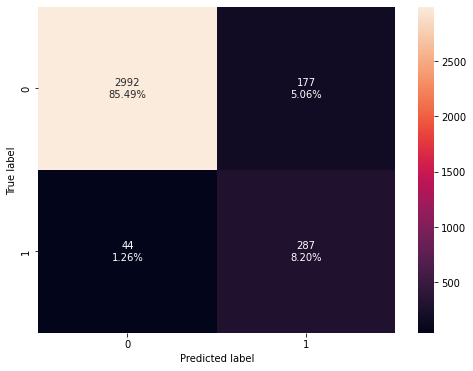

<IPython.core.display.Javascript object>

In [579]:
confusion_matrix_logisticRege_with_threshold(lg, X_train, y_train)

In [580]:
log_reg_train_perf = model_performance_logisticReger_with_threshold(
    lg, X_train, y_train
)

print("Training Peformance")
log_reg_train_perf

Training Peformance


Accuracy  Precision    Recall  F1-Score
0  0.936857   0.618534  0.867069  0.722013

<IPython.core.display.Javascript object>

#### Checking model performance of test data

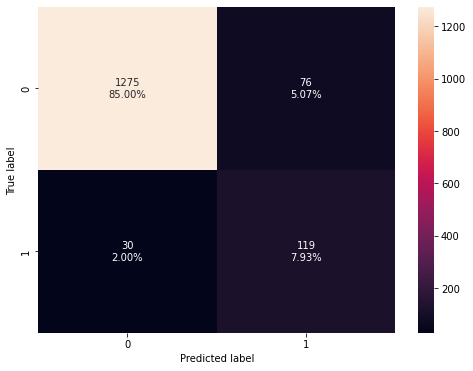

<IPython.core.display.Javascript object>

In [581]:
confusion_matrix_logisticRege_with_threshold(lg, X_test, y_test)

In [582]:
log_reg_test_perf = model_performance_logisticReger_with_threshold(lg, X_test, y_test)

print("Test Peformance")
log_reg_test_perf

Test Peformance


Accuracy  Precision    Recall  F1-Score
0  0.929333   0.610256  0.798658   0.69186

<IPython.core.display.Javascript object>

## ROC-AUC

#### ROC ON TRAINING DATA

rocauc_train_score:  0.9711470352422782


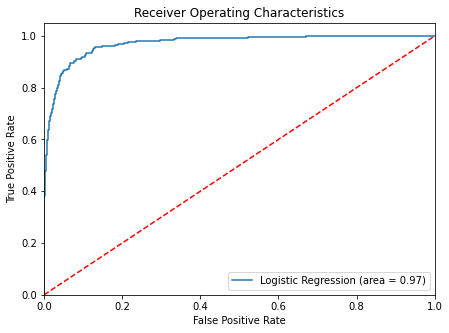

<IPython.core.display.Javascript object>

In [583]:
logit_rocauc_train_score = roc_auc_score(y_train, lg.predict_proba(X_train)[:, 1])
print("rocauc_train_score: ", logit_rocauc_train_score)
fpr, tpr, thresholds = roc_curve(y_train, lg.predict_proba(X_train)[:, 1])
plt.figure(figsize=(7, 5))
plt.plot(
    fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_rocauc_train_score
)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristics")
plt.legend(loc="lower right")
plt.show()

#### ROC ON TEST DATA

rocauc_test_score:  0.9576103209653302


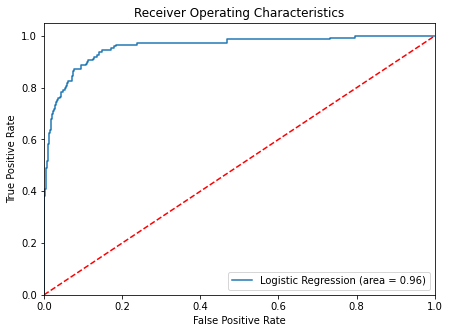

<IPython.core.display.Javascript object>

In [584]:
logit_rocauc_test_score = roc_auc_score(y_test, lg.predict_proba(X_test)[:, 1])
print("rocauc_test_score: ", logit_rocauc_test_score)
fpr, tpr, thresholds = roc_curve(y_test, lg.predict_proba(X_test)[:, 1])
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_rocauc_test_score)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristics")
plt.legend(loc="lower right")
plt.show()

#### Observation
1. Model is giving a generalized performance

## Model performance Improvement  ROC-AUC Threshold 
By changing the model threshold using the ROC-AUC curve, we can see if F1 score can be improved

In [585]:
# Optimal threshold as per AUC-ROC curve
fpr, tpr, thresholds = roc_curve(y_train, lg.predict_proba(X_train)[:, 1])
# The optimal cut off would be where tpr is high and fpr is low
optimal_index= np.argmax(tpr-fpr)
#threshold
optimal_thershold_rocauc=thresholds[optimal_index]

("Optimal threshold using ROC-AUC is :",optimal_thershold_rocauc)


('Optimal threshold using ROC-AUC is :', 0.4388490652489701)

<IPython.core.display.Javascript object>

### Checking model performance of training data

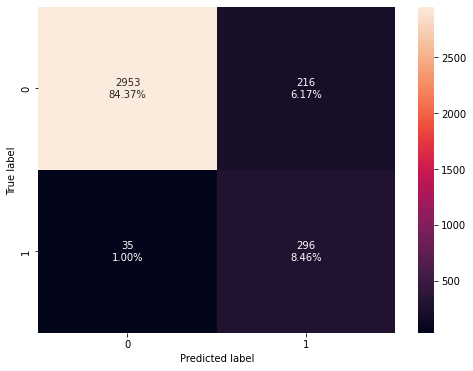

<IPython.core.display.Javascript object>

In [586]:
confusion_matrix_logisticRege_with_threshold(
    lg, X_train, y_train, threshold=optimal_thershold_rocauc
)

In [587]:
log_reg_train_threshold_rocauc = model_performance_logisticReger_with_threshold(
    lg, X_train, y_train, threshold=optimal_thershold_rocauc
)

print("Training Peformance")
log_reg_train_threshold_rocauc

Training Peformance


Accuracy  Precision   Recall  F1-Score
0  0.928286   0.578125  0.89426  0.702254

<IPython.core.display.Javascript object>

### Checking model performance of Test data

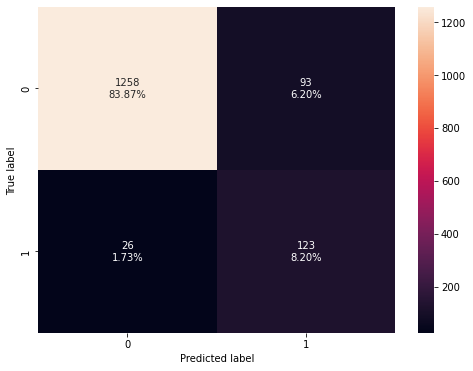

<IPython.core.display.Javascript object>

In [588]:
confusion_matrix_logisticRege_with_threshold(
    lg, X_test, y_test, threshold=optimal_thershold_rocauc
)

In [589]:
log_reg_test_threshold_rocauc = model_performance_logisticReger_with_threshold(
    lg, X_test, y_test, threshold=optimal_thershold_rocauc
)

print("Test Peformance")
log_reg_test_threshold_rocauc

Test Peformance


Accuracy  Precision    Recall  F1-Score
0  0.920667   0.569444  0.825503  0.673973

<IPython.core.display.Javascript object>

#### Observation 

1. The recall of the model for both training and test set has improved but the F1 score and precision has reduced.

## Model performance Improvement  Precision and Recall Curve Threshold

### Let's use Precision-Recall curve and see if we can find a better threshold

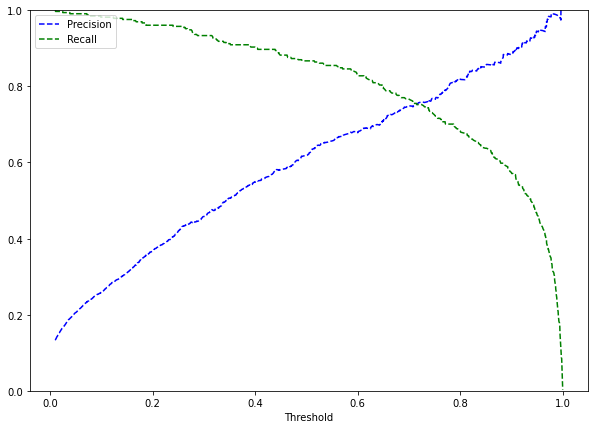

<IPython.core.display.Javascript object>

In [590]:
pre,rec,thres = precision_recall_curve(y_train, lg.predict_proba(X_train)[:,1])

def pre_recall_vs_threshold(precision,recall,thresholds):
    plt.plot(thresholds,precision[:-1],"b--",label="Precision")
    plt.plot(thresholds,recall[:-1],"g--",label="Recall")
    plt.ylim([0,1])
    plt.legend(loc="upper left")
    plt.xlabel("Threshold")


plt.figure(figsize=(10,7))
pre_recall_vs_threshold(pre,rec,thres)
plt.show()



#### Observations
1. At the threshold of 0.73, we get balanced recall and precision.

In [591]:
# setting the threshold
optimal_threshold_precisionrecallcurve = 0.73

<IPython.core.display.Javascript object>

### Checking model performance of training data

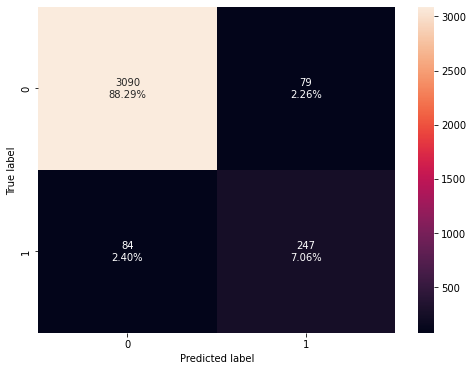

<IPython.core.display.Javascript object>

In [592]:
confusion_matrix_logisticRege_with_threshold(
    lg, X_train, y_train, threshold=optimal_threshold_precisionrecallcurve
)

In [593]:
log_reg_train_threshold_presicionrecall = (
    model_performance_logisticReger_with_threshold(
        lg, X_train, y_train, threshold=optimal_threshold_precisionrecallcurve
    )
)

print("Train Peformance")
log_reg_train_threshold_presicionrecall

Train Peformance


Accuracy  Precision    Recall  F1-Score
0  0.953429   0.757669  0.746224  0.751903

<IPython.core.display.Javascript object>

### Checking model performance of Test data

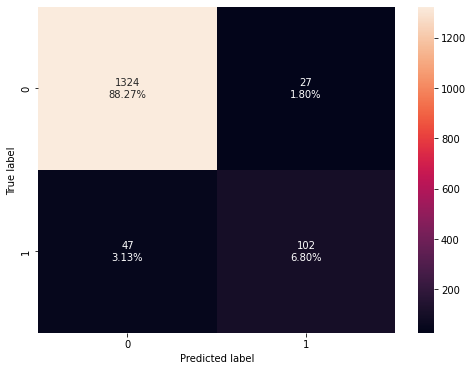

<IPython.core.display.Javascript object>

In [594]:
confusion_matrix_logisticRege_with_threshold(
    lg, X_test, y_test, threshold=optimal_threshold_precisionrecallcurve
)

In [595]:
log_reg_test_threshold_presicionrecall = model_performance_logisticReger_with_threshold(
    lg, X_test, y_test, threshold=optimal_threshold_precisionrecallcurve
)

print("Test Peformance")
log_reg_test_threshold_presicionrecall

Test Peformance


Accuracy  Precision    Recall  F1-Score
0  0.950667   0.790698  0.684564  0.733813

<IPython.core.display.Javascript object>

#### Observations
1. Model is performing well on training and test for precision and f1 _score.Recall has reduced.
2. There's not much improvement in the model performance as the default threshold is 0.50 and here we get 0.73 as the optimal threshold.

# Model Performance summary

In [596]:
model_performace_training_data = pd.concat(
    [
        log_reg_train_perf.T,
        log_reg_train_threshold_rocauc.T,
        log_reg_train_threshold_presicionrecall.T,
    ],
    axis=1,
)
model_performace_training_data.columns = [
    "Logistic Regression ",
    "Logistic Regression - 0.438 threshold",
    "Logistic Regression 0.73 threshold",
]

print("Training performance comparison:")
model_performace_training_data

Training performance comparison:


Logistic Regression   Logistic Regression - 0.438 threshold  \
Accuracy               0.936857                               0.928286   
Precision              0.618534                               0.578125   
Recall                 0.867069                               0.894260   
F1-Score               0.722013                               0.702254   

           Logistic Regression 0.73 threshold  
Accuracy                             0.953429  
Precision                            0.757669  
Recall                               0.746224  
F1-Score                             0.751903

<IPython.core.display.Javascript object>

In [597]:
model_performace_test_data = pd.concat(
    [
        log_reg_test_perf.T,
        log_reg_test_threshold_rocauc.T,
        log_reg_test_threshold_presicionrecall.T,
    ],
    axis=1,
)
model_performace_test_data.columns = [
    "Logistic Regression ",
    "Logistic Regression - 0.438 threshold",
    "Logistic Regression 0.73 threshold",
]

print("Test performance comparison:")
model_performace_test_data

Test performance comparison:


Logistic Regression   Logistic Regression - 0.438 threshold  \
Accuracy               0.929333                               0.920667   
Precision              0.610256                               0.569444   
Recall                 0.798658                               0.825503   
F1-Score               0.691860                               0.673973   

           Logistic Regression 0.73 threshold  
Accuracy                             0.950667  
Precision                            0.790698  
Recall                               0.684564  
F1-Score                             0.733813

<IPython.core.display.Javascript object>

# Sequential Feature Selector (ADDITIONAL)

In [598]:
# Sequential feature selector is present in mlxtend library
!pip install mlxtend

<IPython.core.display.Javascript object>

In [599]:
# Imports

from mlxtend.feature_selection import SequentialFeatureSelector as sfs

# to plot the performance with addition of each feature
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

<IPython.core.display.Javascript object>

In [600]:
# Fitting the Logistic Regression model

lg = LogisticRegression(
    solver="newton-cg",
    n_jobs=-1,
    random_state=1,
    class_weight={0: 0.15, 1: 0.85},
    max_iter=100,
)

<IPython.core.display.Javascript object>

In [601]:
# we will first build model with all varaible
sfs_model = sfs(
    lg,
    k_features=43,
    forward=True,
    floating=False,
    scoring="recall",
    verbose=2,
    cv=3,
    n_jobs=-1,
)

sfs_model = sfs_model.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   10.4s
[Parallel(n_jobs=-1)]: Done  43 out of  43 | elapsed:   11.1s finished

[2022-03-25 16:12:25] Features: 1/43 -- score: 0.8097461097461097[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done  42 out of  42 | elapsed:    3.7s finished

[2022-03-25 16:12:29] Features: 2/43 -- score: 0.8157248157248157[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done  41 out of  41 | elapsed:    3.7s finished

[2022-03-25 16:12:33] Features: 3/43 -- score: 0.8187551187551189[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done  40 out o

<IPython.core.display.Javascript object>

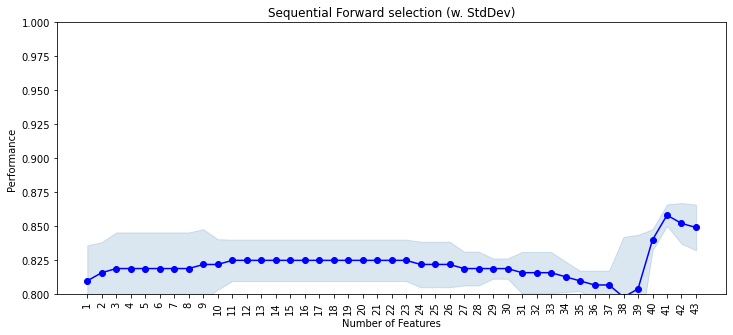

<IPython.core.display.Javascript object>

In [602]:
fig = plot_sfs(sfs_model.get_metric_dict(),kind="std_dev",figsize=(12,5))
plt.ylim([0.8,1])
plt.title("Sequential Forward selection (w. StdDev)")
plt.xticks(rotation=90)
plt.show()


### Observation
1. We can see that performance increases till the 11th feature and then became constant and again at 23 it decreases wiith a trend.
2. So we'll use 11 features only to build our model 

In [603]:
# we will first build model with all varaible
sfs_model1 = sfs(
    lg,
    k_features=11,
    forward=True,
    floating=False,
    scoring="recall",
    verbose=2,
    cv=3,
    n_jobs=-1,
)

sfs_model1 = sfs_model1.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done  43 out of  43 | elapsed:    3.8s finished

[2022-03-25 16:14:01] Features: 1/11 -- score: 0.8097461097461097[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done  42 out of  42 | elapsed:    3.7s finished

[2022-03-25 16:14:05] Features: 2/11 -- score: 0.8157248157248157[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done  41 out of  41 | elapsed:    3.7s finished

[2022-03-25 16:14:09] Features: 3/11 -- score: 0.8187551187551189[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done  40 out o

<IPython.core.display.Javascript object>

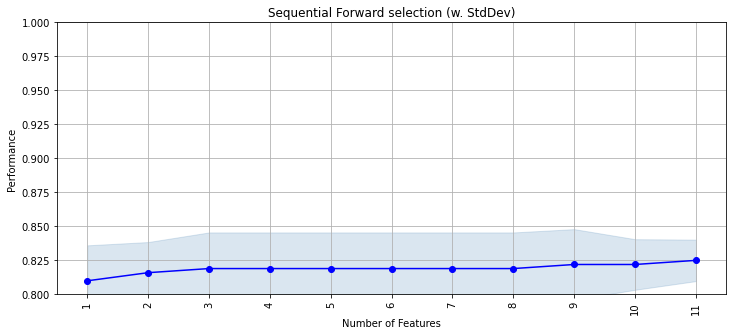

<IPython.core.display.Javascript object>

In [604]:
fig = plot_sfs(sfs_model1.get_metric_dict(), kind="std_dev", figsize=(12, 5))
plt.ylim([0.8, 1])
plt.title("Sequential Forward selection (w. StdDev)")
plt.xticks(rotation=90)
plt.grid()
plt.show()

#### Finiding which features are important

In [605]:
feature_cols = list(sfs_model1.k_feature_idx_)
print(feature_cols)

[2, 7, 14, 16, 17, 18, 19, 20, 22, 24, 27]


<IPython.core.display.Javascript object>

#### The best 11 features

In [606]:
X_train.columns[feature_cols]

Index(['Income', 'Family_4', 'ZIPCode_county_values_Butte County',
       'ZIPCode_county_values_El Dorado County',
       'ZIPCode_county_values_Fresno County',
       'ZIPCode_county_values_Humboldt County',
       'ZIPCode_county_values_Kern County',
       'ZIPCode_county_values_Los Angeles County',
       'ZIPCode_county_values_Monterey County', 'ZIPCode_county_values_Others',
       'ZIPCode_county_values_Sacramento County'],
      dtype='object')

<IPython.core.display.Javascript object>

In [607]:
X_train_final = X_train[X_train.columns[feature_cols]]

# Creating new x_test with the same variables that we selected for x_train
X_test_final = X_test[X_train_final.columns]

<IPython.core.display.Javascript object>

In [608]:
# Fitting logistic regession model

logreg_new = LogisticRegression(
    solver="newton-cg",
    penalty="none",
    verbose=True,
    n_jobs=-1,
    random_state=0,
    class_weight={0: 0.15, 1: 0.85},
)

# There are several optimizer, we are using optimizer called as 'newton-cg' with max_iter equal to 10000
# max_iter indicates number of iteration needed to converge

logreg_new.fit(X_train_final, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.3s finished


LogisticRegression(C=1.0, class_weight={0: 0.15, 1: 0.85}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=-1, penalty='none',
                   random_state=0, solver='newton-cg', tol=0.0001, verbose=True,
                   warm_start=False)

<IPython.core.display.Javascript object>

### Model Performance on train data

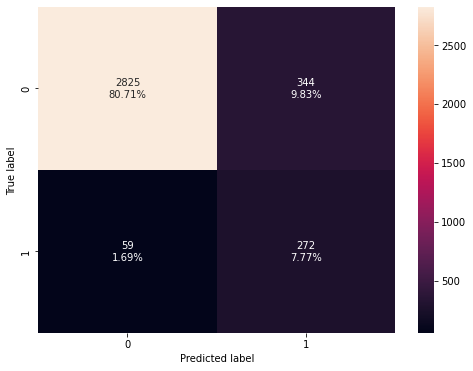

<IPython.core.display.Javascript object>

In [609]:
confusion_matrix_logisticRege_with_threshold(logreg_new, X_train_final, y_train)

In [610]:
model_performance_train_SFSLogit = model_performance_logisticReger_with_threshold(
    logreg_new, X_train_final, y_train
)


print("Train Peformance")
model_performance_train_SFSLogit

Train Peformance


Accuracy  Precision    Recall  F1-Score
0  0.884857   0.441558  0.821752  0.574446

<IPython.core.display.Javascript object>

### Model Performance on Test data

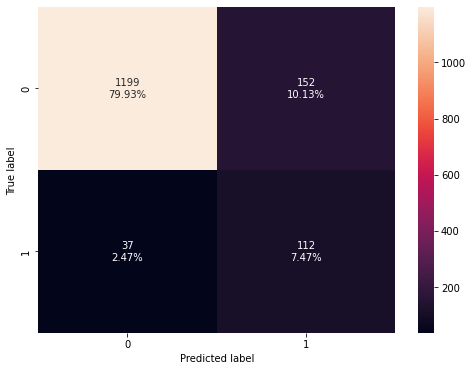

<IPython.core.display.Javascript object>

In [611]:
confusion_matrix_logisticRege_with_threshold(logreg_new, X_test_final, y_test)

In [612]:
model_performance_test_SFSLogit = model_performance_logisticReger_with_threshold(
    logreg_new, X_test_final, y_test
)


print("Test Peformance")
model_performance_test_SFSLogit

Test Peformance


Accuracy  Precision    Recall  F1-Score
0     0.874   0.424242  0.751678  0.542373

<IPython.core.display.Javascript object>

#### Observations
1. Model is giving a generalized performance on training and test set.
2. With a fewer number of features, the model performance is comparable to the initial logistic regression model.

# Model Performance Summary -Logistic Regression


In [613]:
model_performace_training_data = pd.concat(
    [
        log_reg_train_perf.T,
        log_reg_train_threshold_rocauc.T,
        log_reg_train_threshold_presicionrecall.T,
        model_performance_train_SFSLogit.T,
    ],
    axis=1,
)
model_performace_training_data.columns = [
    "Logistic Regression ",
    "Logistic Regression - 0.438 threshold",
    "Logistic Regression 0.73 threshold",
    "Logidtic Regression -SFS",
]

print("Training performance comparison:")
model_performace_training_data

Training performance comparison:


Logistic Regression   Logistic Regression - 0.438 threshold  \
Accuracy               0.936857                               0.928286   
Precision              0.618534                               0.578125   
Recall                 0.867069                               0.894260   
F1-Score               0.722013                               0.702254   

           Logistic Regression 0.73 threshold  Logidtic Regression -SFS  
Accuracy                             0.953429                  0.884857  
Precision                            0.757669                  0.441558  
Recall                               0.746224                  0.821752  
F1-Score                             0.751903                  0.574446

<IPython.core.display.Javascript object>

In [614]:
model_performace_test_data = pd.concat(
    [
        log_reg_test_perf.T,
        log_reg_test_threshold_rocauc.T,
        log_reg_test_threshold_presicionrecall.T,
        model_performance_test_SFSLogit.T,
    ],
    axis=1,
)
model_performace_test_data.columns = [
    "Logistic Regression ",
    "Logistic Regression - 0.438 threshold",
    "Logistic Regression 0.73 threshold",
    "Logidtic Regression -SFS",
]

print("Test performance comparison:")
model_performace_test_data

Test performance comparison:


Logistic Regression   Logistic Regression - 0.438 threshold  \
Accuracy               0.929333                               0.920667   
Precision              0.610256                               0.569444   
Recall                 0.798658                               0.825503   
F1-Score               0.691860                               0.673973   

           Logistic Regression 0.73 threshold  Logidtic Regression -SFS  
Accuracy                             0.950667                  0.874000  
Precision                            0.790698                  0.424242  
Recall                               0.684564                  0.751678  
F1-Score                             0.733813                  0.542373

<IPython.core.display.Javascript object>

# Logistic Regression Conclusion


1. We built a model which has the lesser recall as the initial model but with a threshold of 0.43 we got a good recall score.
2. We have been able to build a predictive model that can be used by AllLife Bank to find the liability customers who would be taking a loan with an recall_score of 0.89 on the training set and make decisions accordingly.

#### Coefficients
1. Coefficient of Age, Income, CCAvg, Mortgage, Family_3, Family_4, some of education, CD_Account_1 and some of ZipCode_Counties are positive.
Increase in these will lead to increase in the chances of a person taking a personal_loan.

2. Coefficient of Experience, Family_2, Securities_Account_1, Online_1, CreditCard_1 and some of ZipCode_Counties are negative.
Increase in these will lead to decrease in the chances of a person taking a personal_loan.

#### Logistic Regression -SFS
1. We built a model Logistic Regression -SFS which has recall score of 0.75 little close to initial  model but with only 11 features.

#### Important features as per Logistic Regression Model
2. We found that Income', 'Family_4', 'ZIPCode_county_values_Butte County', are important features.


# Decision Trees

##### First, let's create functions to calculate different metrics and confusion matrix.

1. The get_recall_score function will be used to check the model performance of models.
2. The make_confusion_matrix function will be used to plot confusion matrix.

In [615]:
# function to compute recall score
def compute_recall_score(model, predictors, target):
    """model : Classifier,
    predictors : independant variables,
    target : dependant variable
    """
    predictions = model.predict(predictors)
    return recall_score(target, predictions)  # returns recall score

<IPython.core.display.Javascript object>

In [616]:
# function confusion matrix decison tree


def confusion_matrix_decisiontree(model, predictors, target):
    """
    model : Classifier
    predictors : independant variables
    target: dependant variable

    """

    # predicting using the independant variable
    predictions = model.predict(predictors)
    cm = confusion_matrix(target, predictions)  # computing confusion matrix
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

## Build Decision Tree Model
1. We will build our model using the DecisionTreeClassifier function. Using default 'gini' criteria to split.
2. In this case, we can pass a dictionary {0:0.15,1:0.85} to the model to specify the weight of each class and the decision tree will give more weightage to class 1.
3. class_weight is a hyperparameter for the decision tree classifier.

In [617]:
model = DecisionTreeClassifier(
    criterion="gini", random_state=1, class_weight={0: 0.15, 1: 0.85}
)

<IPython.core.display.Javascript object>

In [618]:
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight={0: 0.15, 1: 0.85},
                       criterion='gini', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=1, splitter='best')

<IPython.core.display.Javascript object>

#### Checking model performance on training set

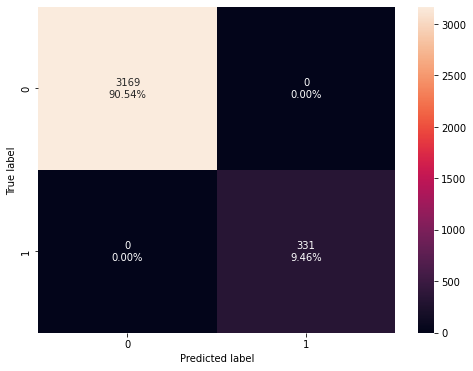

<IPython.core.display.Javascript object>

In [619]:
confusion_matrix_decisiontree(model, X_train, y_train)

In [620]:

decisiontree_performance_train = compute_recall_score(model, X_train, y_train)

print("Recall Score:", decisiontree_performance_train)



Recall Score: 1.0


<IPython.core.display.Javascript object>

#### Observations
1. Model is able to perfectly classify all the data points on the training set.
2. 0 errors on the training set, each sample has been classified correctly.
3. As we know that decision tress will lead to overfitting as they do well on training and fail on test data


#### Checking model performance on test set

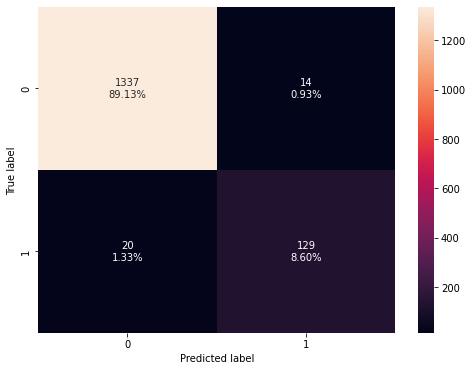

<IPython.core.display.Javascript object>

In [621]:
confusion_matrix_decisiontree(model, X_test, y_test)

In [622]:
decisiontree_performance_test = compute_recall_score(model, X_test, y_test)

print("Recall Score:", decisiontree_performance_test)



Recall Score: 0.8657718120805369


<IPython.core.display.Javascript object>

#### Observations
1. There is a  disparity in performance of model on training set and test set

## Visualizing the Decision Tree

In [623]:
## creating a list of column names
feature_names = X_train.columns.to_list()

<IPython.core.display.Javascript object>

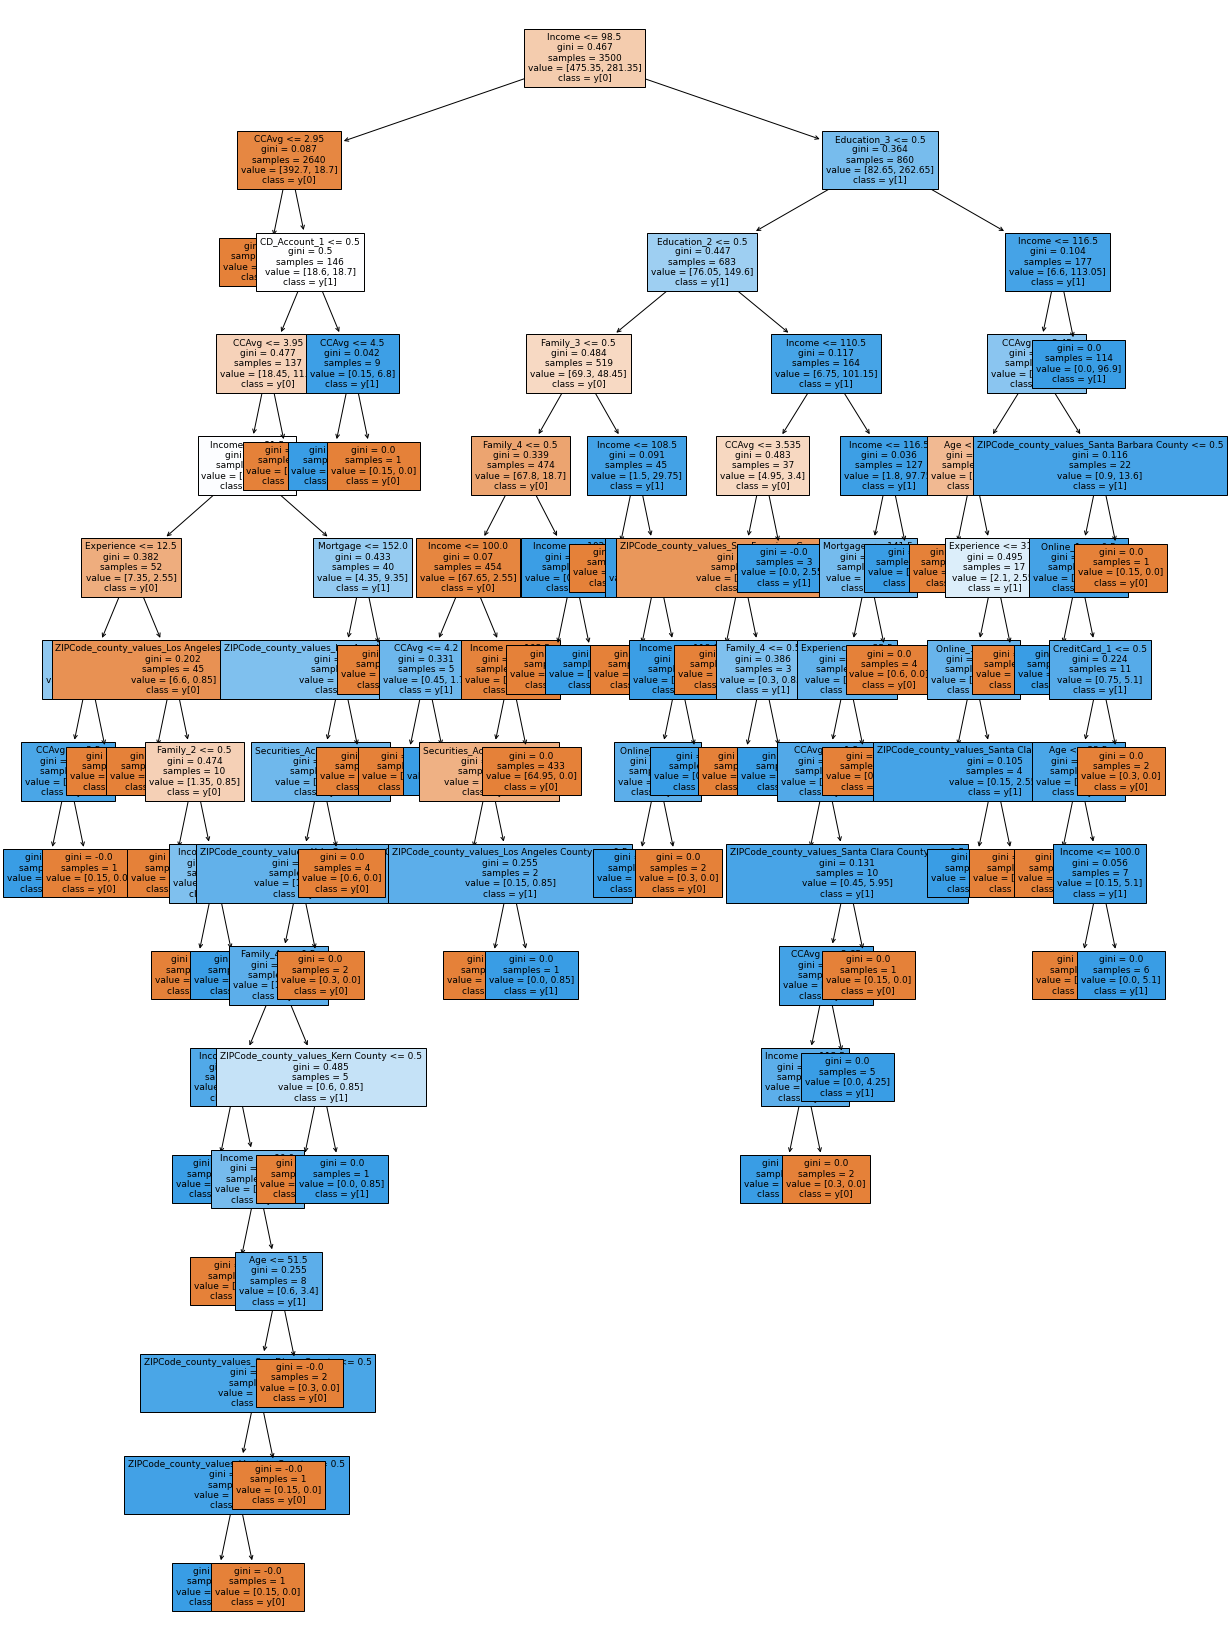

<IPython.core.display.Javascript object>

In [624]:
plt.figure(figsize=(20, 30))
out = tree.plot_tree(
    model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=True,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [625]:
# Text report showing the rules of a decision tree -
print(tree.export_text(model, feature_names=feature_names, show_weights=True))

|--- Income <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [374.10, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account_1 <= 0.50
|   |   |   |--- CCAvg <= 3.95
|   |   |   |   |--- Income <= 81.50
|   |   |   |   |   |--- Experience <= 12.50
|   |   |   |   |   |   |--- Family_4 <= 0.50
|   |   |   |   |   |   |   |--- CCAvg <= 3.50
|   |   |   |   |   |   |   |   |--- weights: [0.00, 1.70] class: 1
|   |   |   |   |   |   |   |--- CCAvg >  3.50
|   |   |   |   |   |   |   |   |--- weights: [0.15, 0.00] class: 0
|   |   |   |   |   |   |--- Family_4 >  0.50
|   |   |   |   |   |   |   |--- weights: [0.60, 0.00] class: 0
|   |   |   |   |   |--- Experience >  12.50
|   |   |   |   |   |   |--- ZIPCode_county_values_Los Angeles County <= 0.50
|   |   |   |   |   |   |   |--- weights: [5.25, 0.00] class: 0
|   |   |   |   |   |   |--- ZIPCode_county_values_Los Angeles County >  0.50
|   |   |   |   |   |   |   |--- Family_2 <= 0.50
|   |   |   |   |   |   |   |   |--- we

<IPython.core.display.Javascript object>

#### Observation 
The Tree is complex and difficult to interpret.

In [626]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(pd.DataFrame(
model.feature_importances_,columns=["Imp"],index=X_train.columns).sort_values(by="Imp",ascending=False))


                                                   Imp
Income                                        0.595500
Education_2                                   0.088134
CCAvg                                         0.080048
Family_4                                      0.072263
Family_3                                      0.070324
Education_3                                   0.035148
CD_Account_1                                  0.011000
Experience                                    0.009156
Age                                           0.007121
Mortgage                                      0.005166
Securities_Account_1                          0.004976
ZIPCode_county_values_Los Angeles County      0.004495
Online_1                                      0.003712
ZIPCode_county_values_San Francisco County    0.002850
ZIPCode_county_values_Kern County             0.001990
Family_2                                      0.001697
ZIPCode_county_values_Santa Clara County      0.001553
CreditCard

<IPython.core.display.Javascript object>

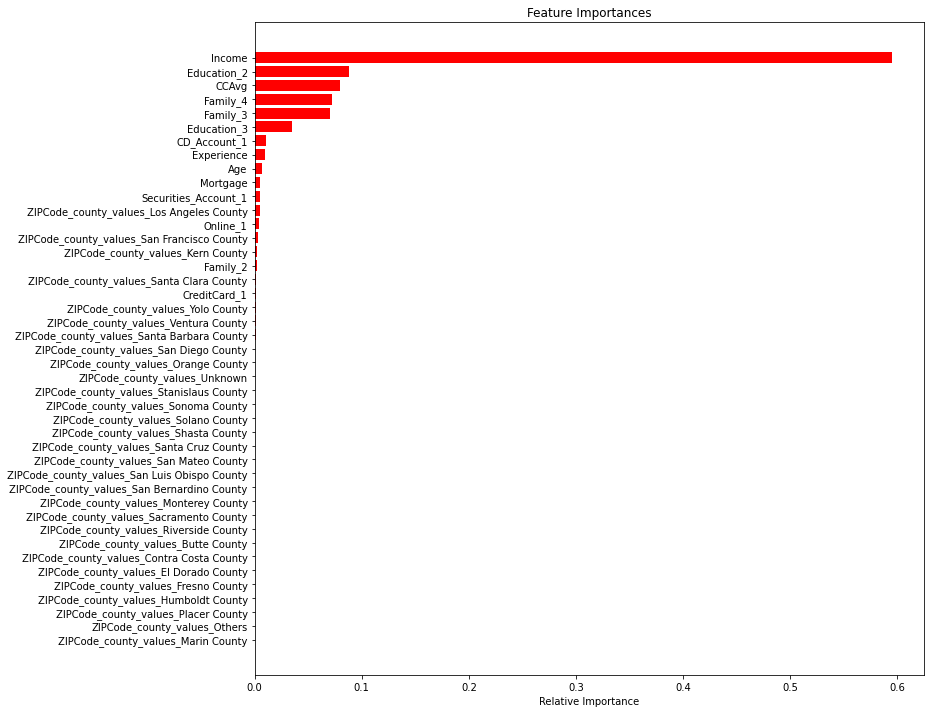

<IPython.core.display.Javascript object>

In [627]:
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="red", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()


#### Observation
1. According to the decision tree model, Income is the most important variable for predicting the Personal_loan followed by Education.

## Reducing over fitting
## Pre pruning 
Using GridSearch for Hyperparameter tuning of our tree model


1. With repeated trials the parameter values have to be changed in order to have a balanced decision tree and a good balanced recall score.
2. Here we play with different values of hyperparameters.
3. based on our tree we used the below parameters

**Decision Tree Type 1**<br>
    "max_depth": np.arange(1, 10),<br>
    "criterion": ["entropy", "gini"],<br>
    "splitter": ["best", "random"],<br>
    "min_impurity_decrease": [0.001, 0.01, 0.1],<br>
     
     **Only this combo gave  balanced value for the recall for the train and test.**
    
**Decision Tree Type 2**<br>        
     "max_depth": [5,10,15,None],<br>
     "min_samples_leaf": [1, 2, 5, 7, 10, 15, 20],<br>
     "max_leaf_nodes": [2, 3, 5, 10],<br>
     "min_impurity_decrease": [0.001, 0.01, 0.1],<br>
     
     Recall Score Test and Train :1 
**Decision Tree Type 3**    
    "max_depth": [np.arange(2, 50, 5), None],<br>
    "criterion": ["entropy", "gini"],<br>
    "splitter": ["best", "random"],<br>
    "min_impurity_decrease": [0.000001, 0.00001, 0.0001],<br>
    
    Recall Score Test and Train :1
**Decision Tree Type 4**    
    'max_depth': np.arange(1,10), <br>
    'min_samples_leaf': [1, 2, 5, 7, 10,15,20],<br>
    'max_leaf_nodes' : [2, 3, 5, 10],<br>
    'min_impurity_decrease': [0.001,0.01,0.1]<br>
    
    Recall Score Test and Train :1
    
**Decision Tree Type 5**              <br>
    "max_depth": [5, 10, 15, None],<br>
    "criterion": ["entropy", "gini"],<br>
    "splitter": ["best", "random"],<br>
    "min_impurity_decrease": [0.00001, 0.0001, 0.01],<br>
    
    Recall Score Test and Train :1

## Using the hyperparatmeters from Decision Tree Type 1(From above analysis)

In [628]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1, class_weight={0: 0.15, 1: 0.85})

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(1, 10),
    "criterion": ["entropy", "gini"],
    "splitter": ["best", "random"],
    "min_impurity_decrease": [0.001, 0.01, 0.1],
}

# Type of scoring used to compare parameter combinations
scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight={0: 0.15, 1: 0.85},
                       criterion='gini', max_depth=5, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.01,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=1, splitter='random')

<IPython.core.display.Javascript object>

### Checking model performance on training set

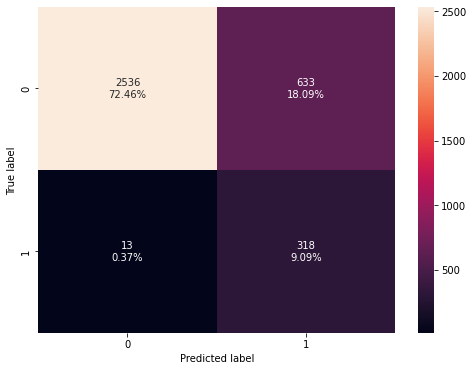

<IPython.core.display.Javascript object>

In [629]:
confusion_matrix_decisiontree(estimator, X_train, y_train)

In [630]:
decisiontree_gridtune_performance_train = compute_recall_score(estimator, X_train, y_train)

print("Recall Score:", decisiontree_gridtune_performance_train)



Recall Score: 0.9607250755287009


<IPython.core.display.Javascript object>

### Checking model performance on test set

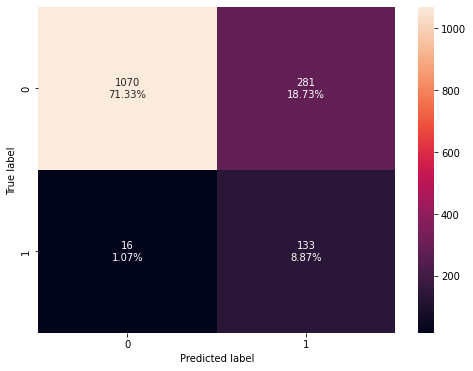

<IPython.core.display.Javascript object>

In [631]:
confusion_matrix_decisiontree(estimator, X_test, y_test)

In [632]:
decisiontree_gridtune_performance_test = compute_recall_score(estimator, X_test, y_test)

print("Recall Score:", decisiontree_gridtune_performance_test)

Recall Score: 0.8926174496644296


<IPython.core.display.Javascript object>

#### Observation
1. Model is giving a generalized result now

# Visualizing the Tree

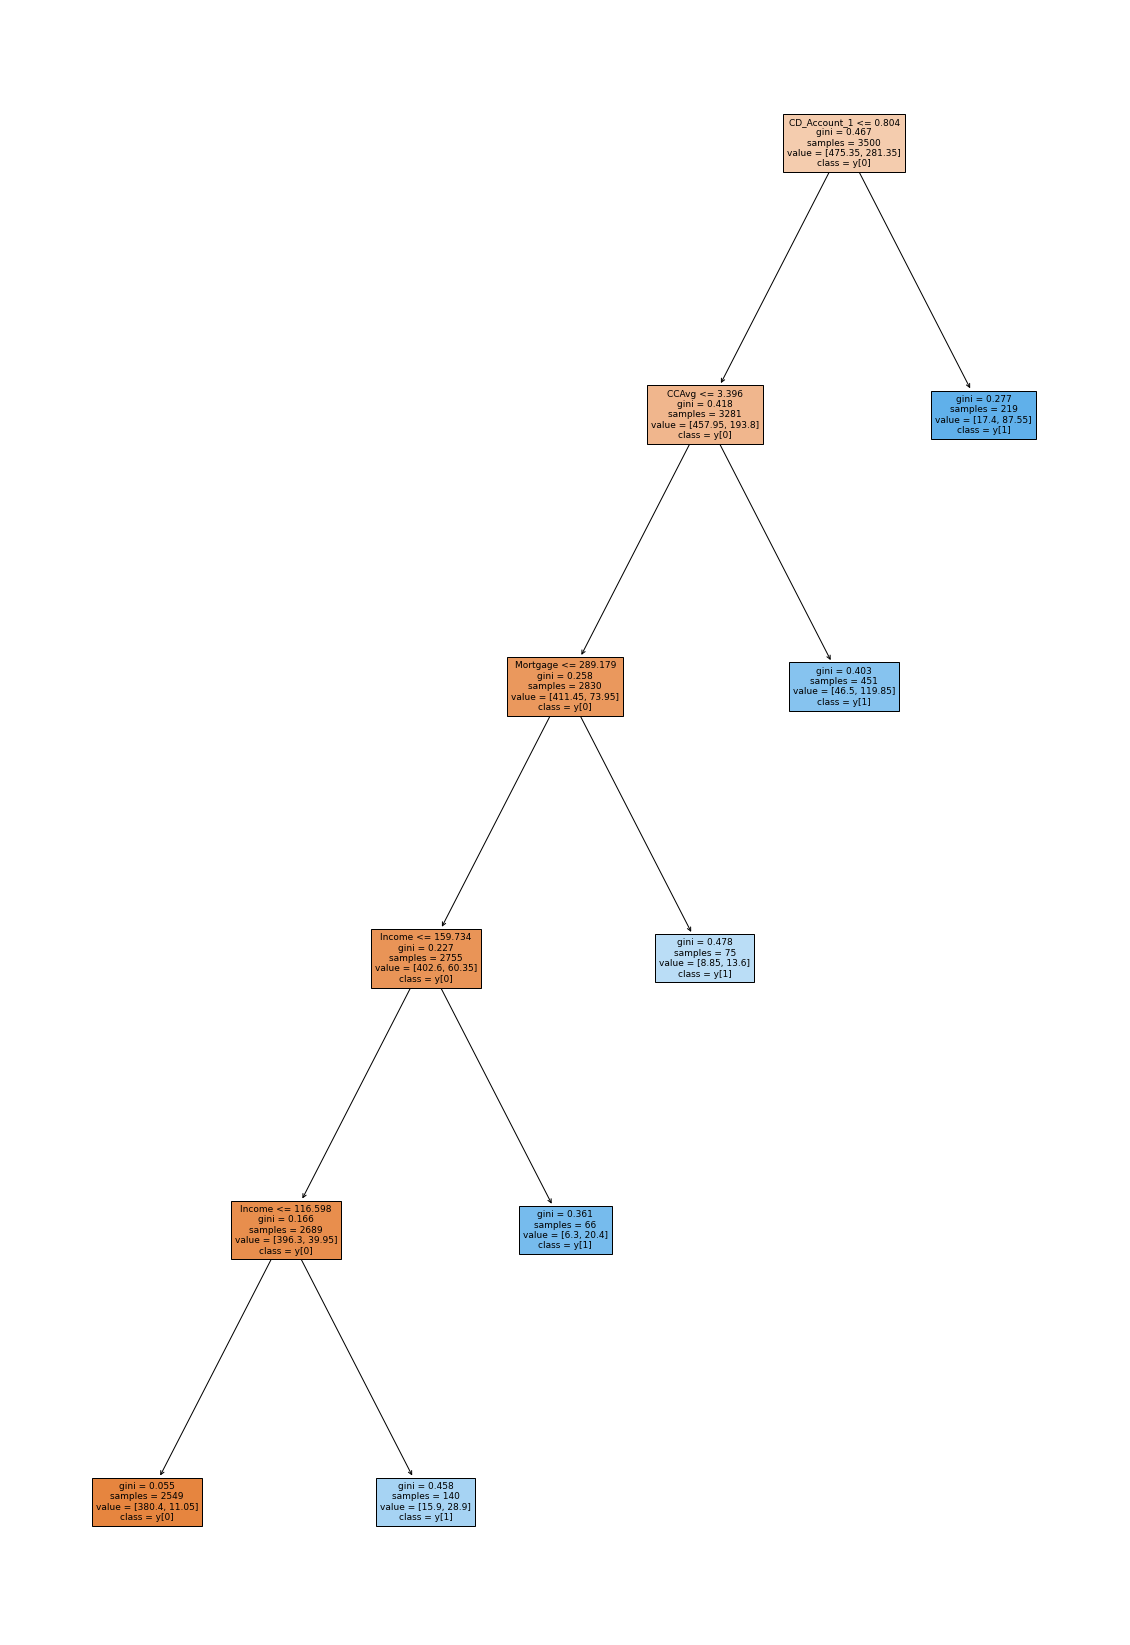

<IPython.core.display.Javascript object>

In [633]:
plt.figure(figsize=(20, 30))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=True,
)
#  add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [634]:
# Text report showing the rules of a decision tree -
print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- CD_Account_1 <= 0.80
|   |--- CCAvg <= 3.40
|   |   |--- Mortgage <= 289.18
|   |   |   |--- Income <= 159.73
|   |   |   |   |--- Income <= 116.60
|   |   |   |   |   |--- weights: [380.40, 11.05] class: 0
|   |   |   |   |--- Income >  116.60
|   |   |   |   |   |--- weights: [15.90, 28.90] class: 1
|   |   |   |--- Income >  159.73
|   |   |   |   |--- weights: [6.30, 20.40] class: 1
|   |   |--- Mortgage >  289.18
|   |   |   |--- weights: [8.85, 13.60] class: 1
|   |--- CCAvg >  3.40
|   |   |--- weights: [46.50, 119.85] class: 1
|--- CD_Account_1 >  0.80
|   |--- weights: [17.40, 87.55] class: 1



<IPython.core.display.Javascript object>

In [635]:
# importance of features in the tree building

print(
    pd.DataFrame(
        estimator.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

# Here we will see that importance of features has increased

                                                   Imp
CCAvg                                         0.409899
Income                                        0.273431
CD_Account_1                                  0.267058
Mortgage                                      0.049611
ZIPCode_county_values_Santa Clara County      0.000000
ZIPCode_county_values_Riverside County        0.000000
ZIPCode_county_values_Sacramento County       0.000000
ZIPCode_county_values_San Bernardino County   0.000000
ZIPCode_county_values_San Diego County        0.000000
ZIPCode_county_values_San Francisco County    0.000000
ZIPCode_county_values_San Luis Obispo County  0.000000
ZIPCode_county_values_San Mateo County        0.000000
ZIPCode_county_values_Santa Barbara County    0.000000
Age                                           0.000000
ZIPCode_county_values_Santa Cruz County       0.000000
ZIPCode_county_values_Others                  0.000000
ZIPCode_county_values_Shasta County           0.000000
ZIPCode_co

<IPython.core.display.Javascript object>

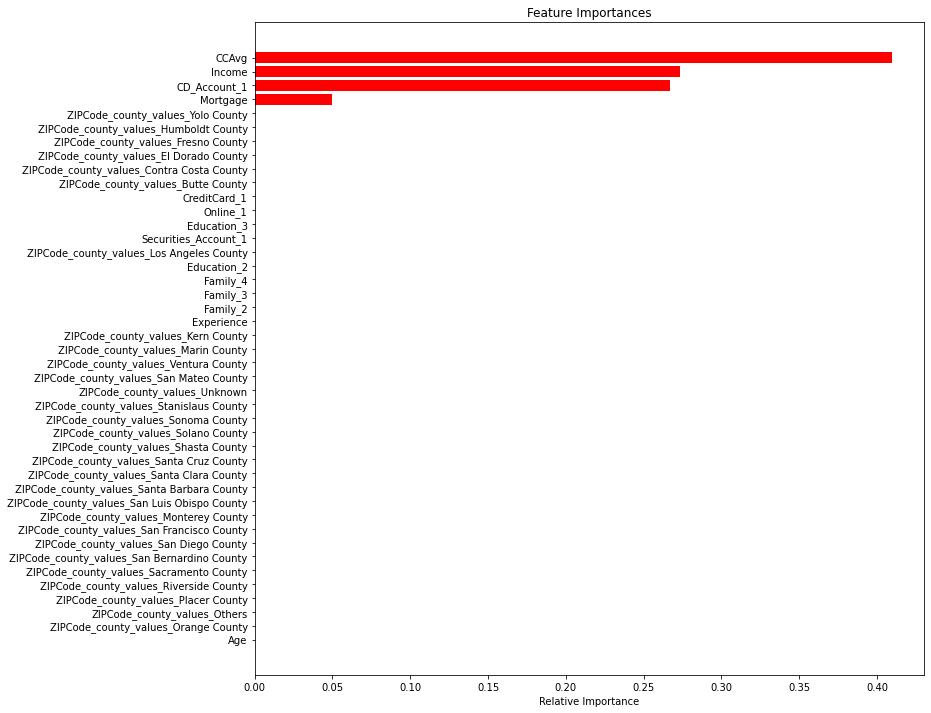

<IPython.core.display.Javascript object>

In [636]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="red", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

#### Observations
1. In tuned decision tree income is the most important feature is CCAvg followed by Income.

# Cost Complexity Pruning
## Post Pruning

## Total impurity of leaves vs effective alphas of pruned tree

In [637]:
clf = DecisionTreeClassifier(random_state=1, class_weight={0: 0.15, 1: 0.85})
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

<IPython.core.display.Javascript object>

In [638]:
pd.DataFrame(path)

ccp_alphas    impurities
0     0.000000 -7.639375e-15
1     0.000337  3.369896e-04
2     0.000364  7.013026e-04
3     0.000364  1.429929e-03
4     0.000369  2.535676e-03
5     0.000374  2.910109e-03
6     0.000385  3.295239e-03
7     0.000388  3.683141e-03
8     0.000391  4.854794e-03
9     0.000393  5.247603e-03
10    0.000461  7.093576e-03
11    0.000580  8.835030e-03
12    0.000586  9.421099e-03
13    0.000586  1.000717e-02
14    0.000598  1.180165e-02
15    0.000655  1.245629e-02
16    0.000702  1.386050e-02
17    0.000879  1.473946e-02
18    0.000909  1.564880e-02
19    0.000940  1.658924e-02
20    0.000941  1.847078e-02
21    0.001011  1.948194e-02
22    0.001013  2.049511e-02
23    0.001019  2.151405e-02
24    0.001031  2.254505e-02
25    0.001151  2.369625e-02
26    0.001331  2.502754e-02
27    0.001400  2.642747e-02
28    0.001638  2.806552e-02
29    0.001686  3.143833e-02
30    0.002603  3.404096e-02
31    0.002742  3.678339e-02
32    0.003336  4.011939e-02
33    0.003410  4.352930e-02
34    0.003527  4.705652e-02
35    0.004797  5.665076e-02
36    0.005138  6.178904e-02
37    0.006726  6.851486e-02
38    0.022532  9.104708e-02
39    0.030573  2.133399e-01
40    0.253796  4.671356e-01

<IPython.core.display.Javascript object>

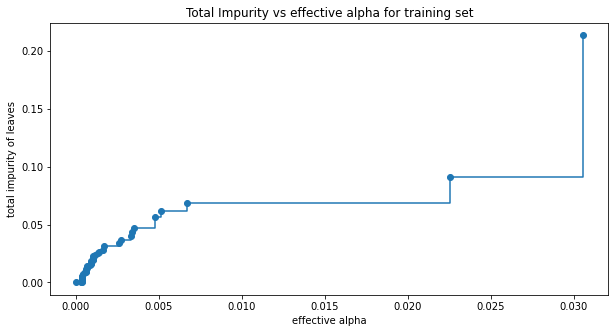

<IPython.core.display.Javascript object>

In [639]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

#### Observations
1. As ALpha increases impurity also increases.
2. Next, we train a decision tree using the effective alphas. The last value in ccp_alphas is the alpha value that prunes the whole tree, leaving the tree, clfs[-1], with one node.

In [640]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight={0: 0.15, 1: 0.85}
    )
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.2537957148948095


<IPython.core.display.Javascript object>

#### Observations
For the remainder, we remove the last element in clfs and ccp_alphas, because it is the trivial tree with only one node. Here we show that the number of nodes and tree depth decreases as alpha increases.

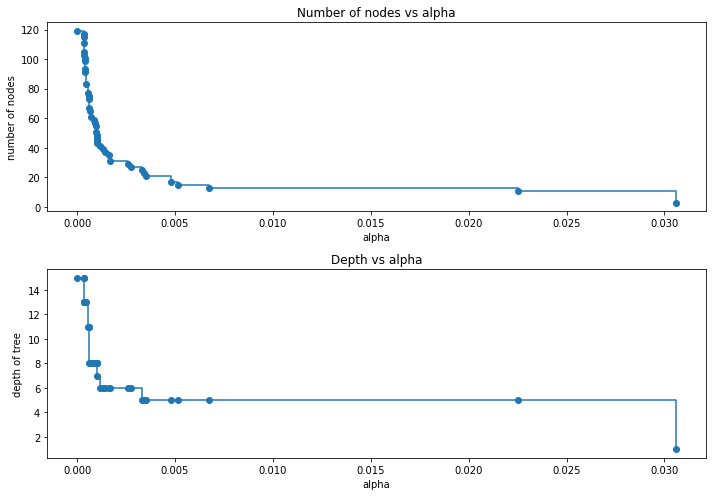

<IPython.core.display.Javascript object>

In [641]:
clfs = clfs[:-1]  # remove last element
ccp_alphas = ccp_alphas[:-1]  # remove last element in alpha

node_counts = [clf.tree_.node_count for clf in clfs]  # get the node count
depth = [clf.tree_.max_depth for clf in clfs]  # get the max depth
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(
    ccp_alphas, node_counts, marker="o", drawstyle="steps-post"
)  # PLot ALpha vs node count
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(
    ccp_alphas, depth, marker="o", drawstyle="steps-post"
)  # PLot ALpha vs max depth
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

#### Recall for all training data

In [642]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

<IPython.core.display.Javascript object>

#### Recall for all test data

In [643]:
recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

<IPython.core.display.Javascript object>

In [644]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]


<IPython.core.display.Javascript object>

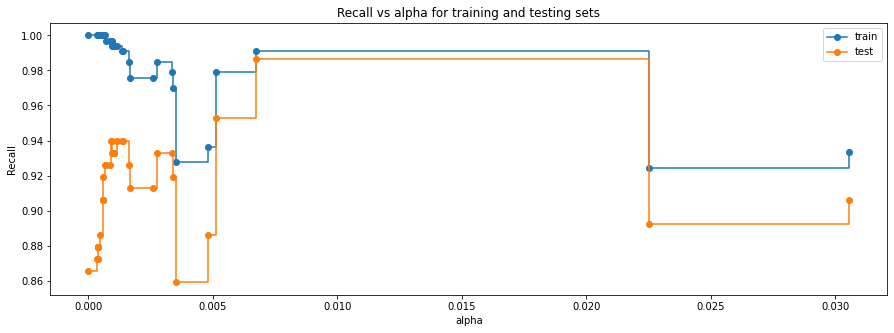

<IPython.core.display.Javascript object>

In [645]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(
    ccp_alphas,
    recall_train,
    marker="o",
    label="train",
    drawstyle="steps-post",
)  #  recall train and alpha
ax.plot(
    ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post"
)  #  recall test and alpha
ax.legend()
plt.show()

#### Observations
Maximum value of Recall is at 0.0067 alpha, but if we choose decision tree will only have a root node and we would lose the buisness rules, instead we can choose alpha 0.0017 retaining information and getting higher recall.

In [646]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.0067258136904066665,
                       class_weight={0: 0.15, 1: 0.85}, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')


<IPython.core.display.Javascript object>

In [647]:
best_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0067258136904066665,
                       class_weight={0: 0.15, 1: 0.85}, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

<IPython.core.display.Javascript object>

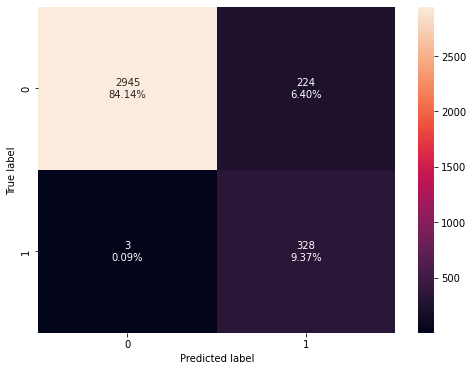

<IPython.core.display.Javascript object>

In [648]:
confusion_matrix_decisiontree(best_model, X_train, y_train)


In [649]:
decisiontree_ccalpha_performance_train = compute_recall_score(best_model, X_train, y_train)

print("Recall Score:", decisiontree_ccalpha_performance_train)


Recall Score: 0.9909365558912386


<IPython.core.display.Javascript object>

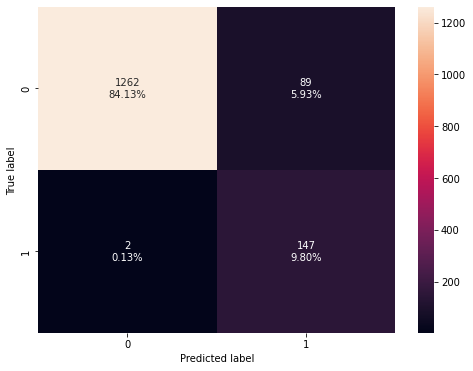

<IPython.core.display.Javascript object>

In [650]:
confusion_matrix_decisiontree(best_model, X_test, y_test)


In [651]:
decisiontree_ccalpha_performance_test = compute_recall_score(best_model, X_test, y_test)

print("Recall Score:", decisiontree_ccalpha_performance_test)


Recall Score: 0.9865771812080537


<IPython.core.display.Javascript object>

#### Observation
1. Looks like the model is overfitting and losing important business information

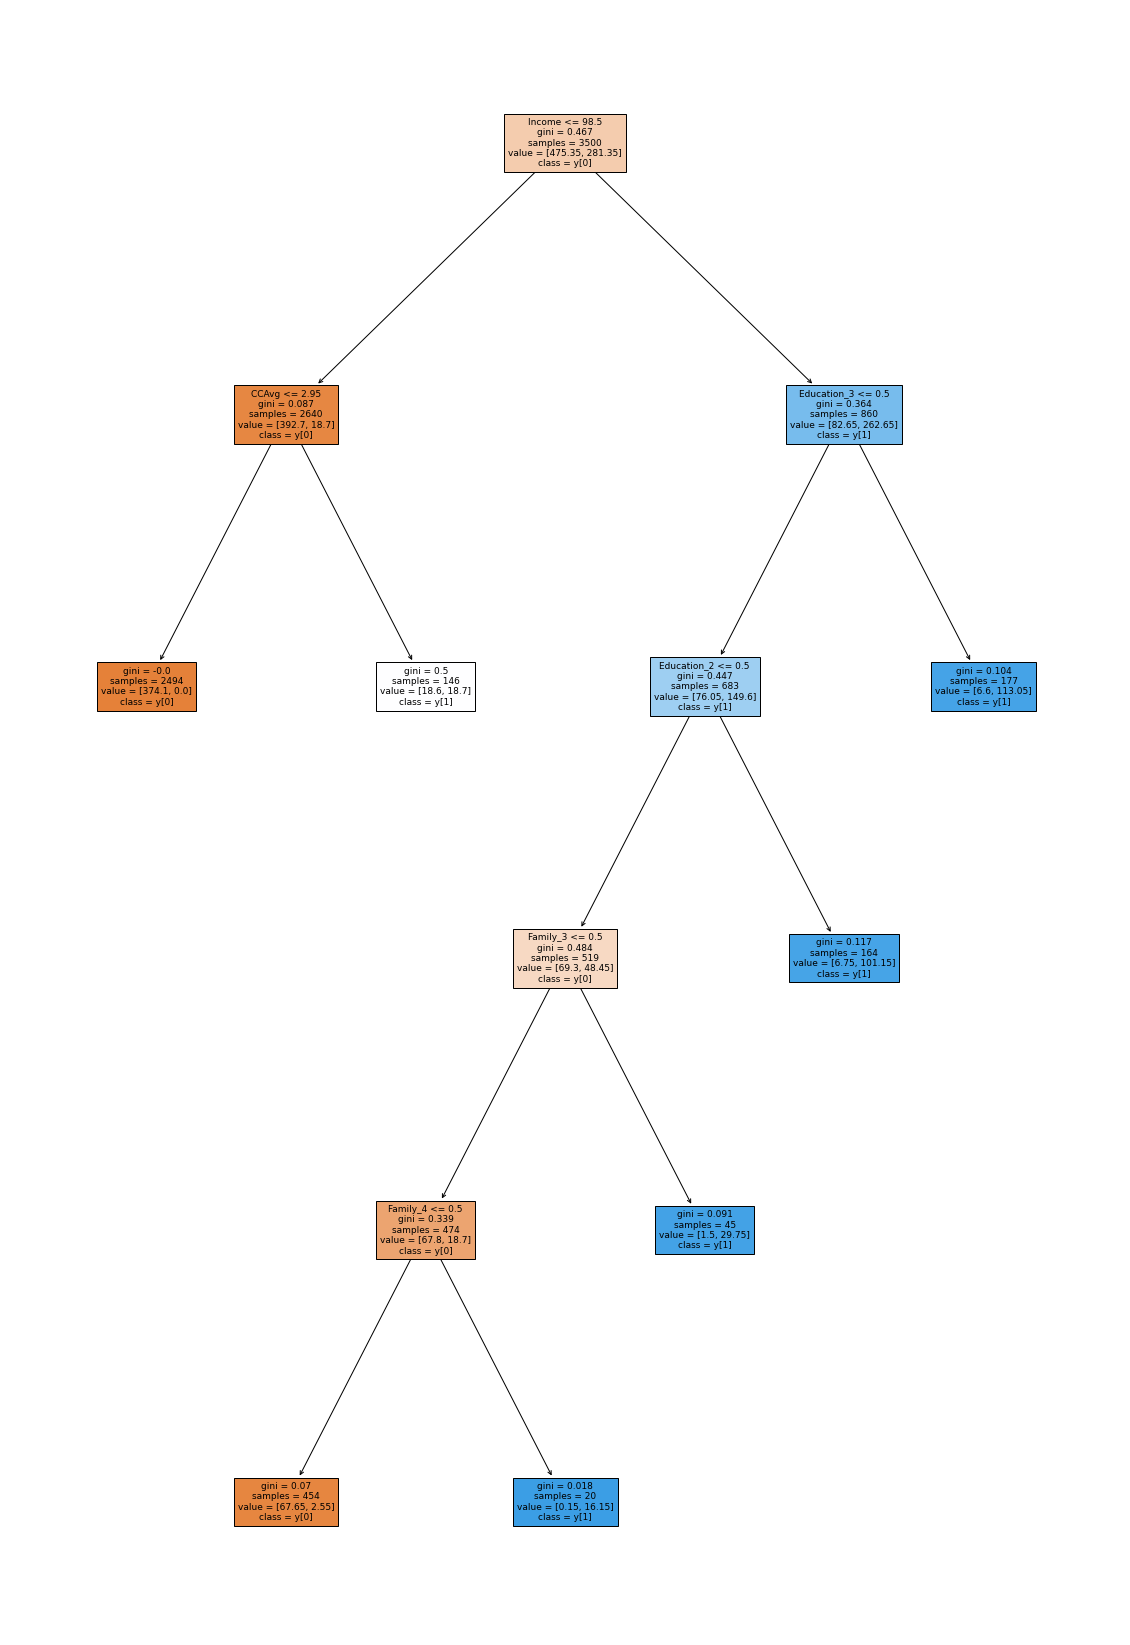

<IPython.core.display.Javascript object>

In [652]:
plt.figure(figsize=(20, 30))
out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=True,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [653]:
# Text report showing the rules of a decision tree -
print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))

|--- Income <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [374.10, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- weights: [18.60, 18.70] class: 1
|--- Income >  98.50
|   |--- Education_3 <= 0.50
|   |   |--- Education_2 <= 0.50
|   |   |   |--- Family_3 <= 0.50
|   |   |   |   |--- Family_4 <= 0.50
|   |   |   |   |   |--- weights: [67.65, 2.55] class: 0
|   |   |   |   |--- Family_4 >  0.50
|   |   |   |   |   |--- weights: [0.15, 16.15] class: 1
|   |   |   |--- Family_3 >  0.50
|   |   |   |   |--- weights: [1.50, 29.75] class: 1
|   |   |--- Education_2 >  0.50
|   |   |   |--- weights: [6.75, 101.15] class: 1
|   |--- Education_3 >  0.50
|   |   |--- weights: [6.60, 113.05] class: 1



<IPython.core.display.Javascript object>

#### Observation
1. This model might be giving the highest recall but a buisness would not be able to use it to actually target the potential customers

## Creating model with 0.0017 ccp_alpha

In [654]:
best_model2 = DecisionTreeClassifier(
    ccp_alpha=0.0017, class_weight={0: 0.15, 1: 0.85}, random_state=1
)
best_model2.fit(X_train, y_train)


DecisionTreeClassifier(ccp_alpha=0.0017, class_weight={0: 0.15, 1: 0.85},
                       criterion='gini', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=1, splitter='best')

<IPython.core.display.Javascript object>

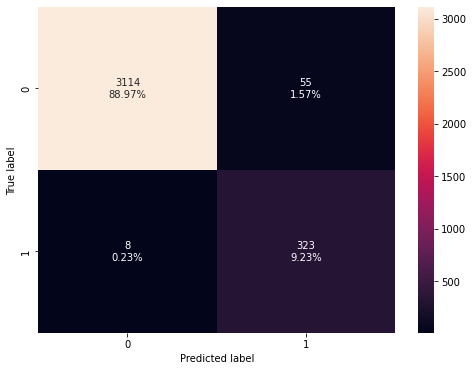

<IPython.core.display.Javascript object>

In [655]:
confusion_matrix_decisiontree(best_model2, X_train, y_train)


In [656]:
decisiontree_ccalphapost_pruned_performance_train = compute_recall_score(best_model2, X_train, y_train)

print("Recall Score:", decisiontree_ccalphapost_pruned_performance_train)


Recall Score: 0.9758308157099698


<IPython.core.display.Javascript object>

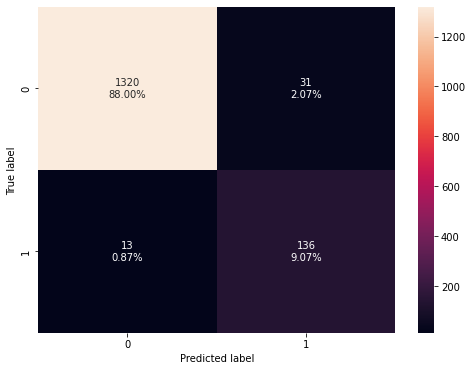

<IPython.core.display.Javascript object>

In [657]:
confusion_matrix_decisiontree(best_model2, X_test, y_test)

In [658]:
decisiontree_ccalphapost_pruned_performance_test = compute_recall_score(best_model2, X_test, y_test)

print("Recall Score:", decisiontree_ccalphapost_pruned_performance_test)


Recall Score: 0.912751677852349


<IPython.core.display.Javascript object>

#### Observations
1. The results have improved from the initial model.
2. The performance is comparable to the hyperparameter tuned model.
3. The model is giving a generalized performance on training and test set.

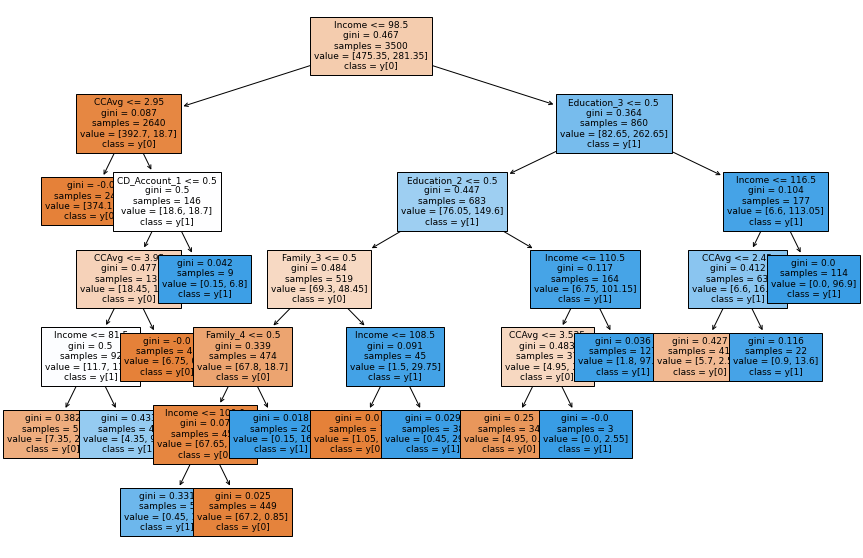

<IPython.core.display.Javascript object>

In [659]:
plt.figure(figsize=(15, 10))

out = tree.plot_tree(
    best_model2,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=True,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [660]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model2, feature_names=feature_names, show_weights=True))

|--- Income <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [374.10, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account_1 <= 0.50
|   |   |   |--- CCAvg <= 3.95
|   |   |   |   |--- Income <= 81.50
|   |   |   |   |   |--- weights: [7.35, 2.55] class: 0
|   |   |   |   |--- Income >  81.50
|   |   |   |   |   |--- weights: [4.35, 9.35] class: 1
|   |   |   |--- CCAvg >  3.95
|   |   |   |   |--- weights: [6.75, 0.00] class: 0
|   |   |--- CD_Account_1 >  0.50
|   |   |   |--- weights: [0.15, 6.80] class: 1
|--- Income >  98.50
|   |--- Education_3 <= 0.50
|   |   |--- Education_2 <= 0.50
|   |   |   |--- Family_3 <= 0.50
|   |   |   |   |--- Family_4 <= 0.50
|   |   |   |   |   |--- Income <= 100.00
|   |   |   |   |   |   |--- weights: [0.45, 1.70] class: 1
|   |   |   |   |   |--- Income >  100.00
|   |   |   |   |   |   |--- weights: [67.20, 0.85] class: 0
|   |   |   |   |--- Family_4 >  0.50
|   |   |   |   |   |--- weights: [0.15, 16.15] class: 1
|   |   |   |---

<IPython.core.display.Javascript object>

In [661]:
print(
    pd.DataFrame(
        best_model2.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                                   Imp
Income                                        0.627273
Education_2                                   0.094494
CCAvg                                         0.080251
Family_3                                      0.075399
Family_4                                      0.073107
Education_3                                   0.037684
CD_Account_1                                  0.011793
Age                                           0.000000
ZIPCode_county_values_Santa Clara County      0.000000
ZIPCode_county_values_Sacramento County       0.000000
ZIPCode_county_values_San Bernardino County   0.000000
ZIPCode_county_values_San Diego County        0.000000
ZIPCode_county_values_San Francisco County    0.000000
ZIPCode_county_values_San Luis Obispo County  0.000000
ZIPCode_county_values_San Mateo County        0.000000
ZIPCode_county_values_Santa Barbara County    0.000000
ZIPCode_county_values_Sonoma County           0.000000
ZIPCode_co

<IPython.core.display.Javascript object>

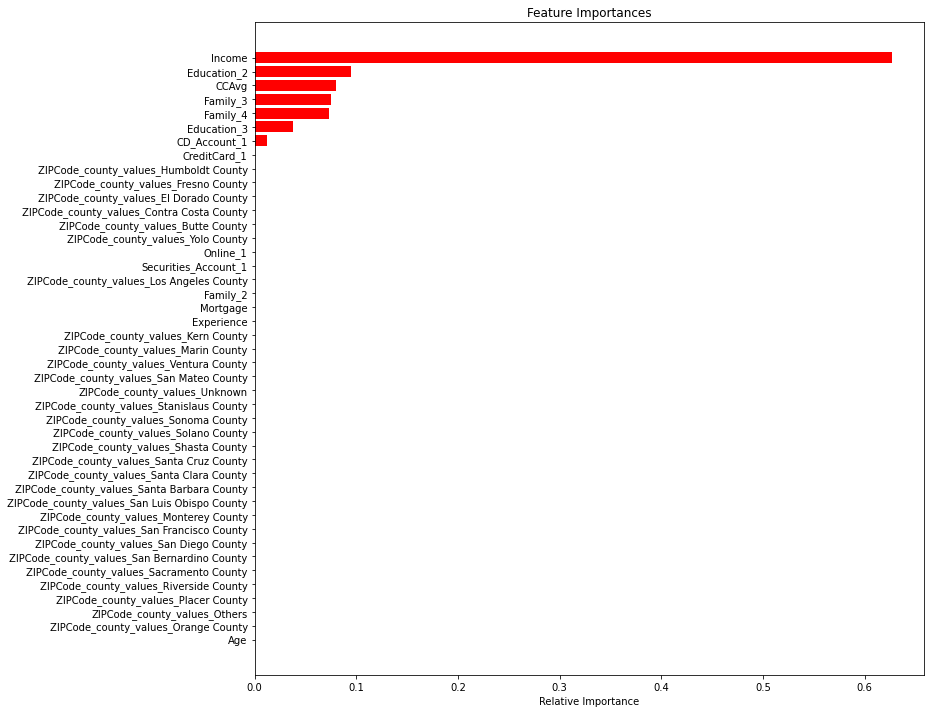

<IPython.core.display.Javascript object>

In [662]:
importances = best_model2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="red", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

#### Observations
1. Income and Education are the top two important features to predict customer will take a personal loan or not.

In [663]:
# training performance comparison

models_train_comp_df = pd.DataFrame(
    [
        decisiontree_performance_train,
        decisiontree_gridtune_performance_train,
        decisiontree_ccalphapost_pruned_performance_train,
    ],
    columns=["Recall on training set"],
)

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Recall on training set
0                1.000000
1                0.960725
2                0.975831

<IPython.core.display.Javascript object>

In [664]:
# testing performance comparison

models_test_comp_df = pd.DataFrame(
    [
        decisiontree_performance_test,
        decisiontree_gridtune_performance_test,
        decisiontree_ccalphapost_pruned_performance_test,
    ],
    columns=["Recall on testing set"],
)

print("Test performance comparison:")
models_test_comp_df

Test performance comparison:


Recall on testing set
0               0.865772
1               0.892617
2               0.912752

<IPython.core.display.Javascript object>

#### Observation
1. Tree with post pruning with an ccp_alpha of 0.0017 has given the best recall on test and training.

# Decision Tree Conclusion

1. Decision tree model with post-pruning has given the best recall score on training data.
2. The pre-pruned and the post-pruned models have reduced overfitting and the model is giving a generalized performance.
3. We analyzed the Liability Customers who have taken Personal_Loan  using different techniques and used Decision Tree Classifier to build a predictive model for the same.
4. The model built can be used to predict if a Liability customer is going to take a Personal_Loan with AllLife bank or not.
5. We visualized different trees and their confusion matrix to get a better understanding of the model. 
6. We verified the fact that how much less data preparation is needed for Decision Trees even with outliers present and also having imbalanced classes in some features.
#### Important Features
1. Income, Education_2 and CCAvg are the most important variable in predicting the customers that will take a personal_loan with the bank.
2. We established the importance of hyper-parameters/ pruning to reduce overfitting.

## Desicion Tree Business Insights and recommendations
1. If a Liability customer whose income is greater than 98.5k most likely will take a personal_loan with AllLife Bank.
2. If a Liability customer whose Income is less than  98.50k and with CCAvg less than 2.95 most likely will not take a personal_loan with AllLife Bank.


# Comparing Logistic Regression and Desicion Tree

1. Logistic Regression model with threshold 0.43 gives the best recall of 0.894260	on training and 0.82 on test data.
2. Decision tree using post pruning with ccp_alpha 0.0017 has a recall of 0.97 on training data and 0.91 on test data.

## Thus Decision tree using post pruning can be used to make business decisions for AllLife Bank

# Final Business recommendations for AllLife Bank USA
 These points can be taken into considerations to increase the conversion rates

1. It is good to target more on high earning customers like doctors,engineers, PHDs,entrepreneurs etc.
2. Management can concentrate more on highly educated customers because the conversion rate is high. They can market more in highly skilled work places and in highly skilled communities.
3. Management can concentrate more on highly on middle experience level (12 and 8 years) crowds because the conversion rate is high. 
4. Management can concentrate more  highly on bigger families than smaller ones because the conversion rate is high.
 They can have adds based on family benefits for bigger families.They can offer good family interest rates as well.
5. Customers who invest in stocks and bond are good targets to convert them to take a loan.More promotional activities can be offered like giving investment knowledge etc to attract the customers if they take a loan with the bank.
6. Customers who have CD_Accounts can also be a good target. These customers can be given good return rates on their CD_Accounts if they take a personal_loan. Such kind of attractive sales technique is needed.
7. More campaigns in the following counties are recommended Los Angeles County, Santa Clara County, San Diego County, Alameda County. Also tier 2 counties can be a place for good conversion rates.
8. Customers with mortgage can be targeted as they are already in a process and can be offered good interest rates based on their credit scores.
9. Internet usage among personal loan customers is high. Lot of maarketing can be done on their portal / dashboard with exciting deals for interest rates .
10. Shopping malls are a good place to have a stalls and an presentation to market the loans features to a wide range of customers.
11. Testimonials of happy customers with the loan can be posted onine as everone is going digital.
12. Celebrities can endorse for the bank offering loans and its promising service and trustworthyness.
13. Campaign ideas have to be more creative and artistic linking charities and marathons so that people's attention can be caught easily. 